
# **MIS710 Lab 8 Soltuion**
Author: Associate Professor Lemai Nguyen

**Objectives**:
1. Model optimisation
2. Cross validation
3. Ensemble learning

**Suggestion**: Complete both Tasks 1 and 2 to ensure you perform well in both Regression and Classification!


# **Import basic libraries and functions**

In [1]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



# **1. Task 1: Diabetes Classification**

**Reference**: Pima Indians Diabetes Database Predict the onset of diabetes based on diagnostic measures

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Data**: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Outcome 1 means diabests and Outcome 0 means Healthy.

**Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Tasks**

To build an ensemble learning model to accurately predict whether or not the patients in the dataset have diabetes or not

Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## **1.1 Loading and inspecting data**

In [2]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/Diabetes.csv'

In [3]:
#load data and display 10 first records
records = pd.read_csv(url)

records.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#display data data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **1.2 Pre-processing data and EDA**

### **Inspecting and cleansing data**
* Inspect columns
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


**1.2 Detect and handle missing data as needed**

In [5]:
#Inspect missing data
print(records.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.

**Explore the relationships between the target variable and other variables, and explore the relationships among the non-target variables as well**

**Explore the target variable**

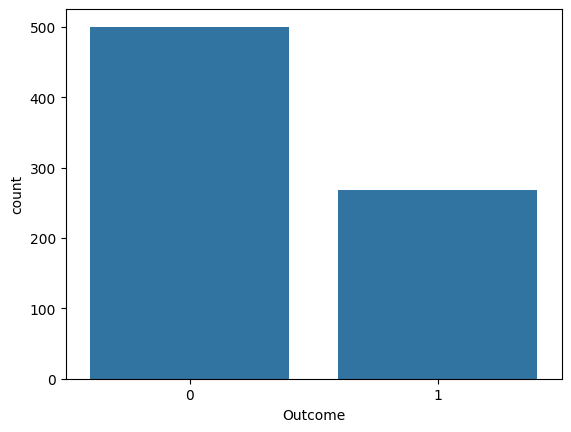

In [6]:
from pandas.io.parsers.readers import annotations
    #create barchats
plot=sns.countplot(data=records, x='Outcome')
plt.show()

In [7]:
outcome_counts = records.Outcome.value_counts()
outcome_counts

Outcome
0    500
1    268
Name: count, dtype: int64

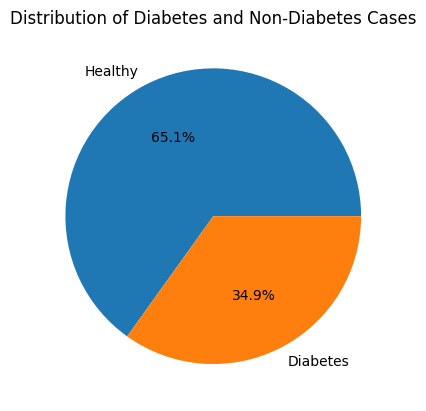

In [8]:
#Let's generate a pie chart with the distribution of diabetes and non-diabetes cases, along with percentage labels.

outcome_labels = ['Healthy', 'Diabetes']
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%')
plt.title('Distribution of Diabetes and Non-Diabetes Cases')
plt.show()


**Explore numeric variables**

In [9]:
##Write your code to view descriptive stats of numeric variables; hint: use describe()
records.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


See the above outcome: note the range across variables;
note mean and std, note mean and median, IQR.. for each numeric variable,

Age :

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64




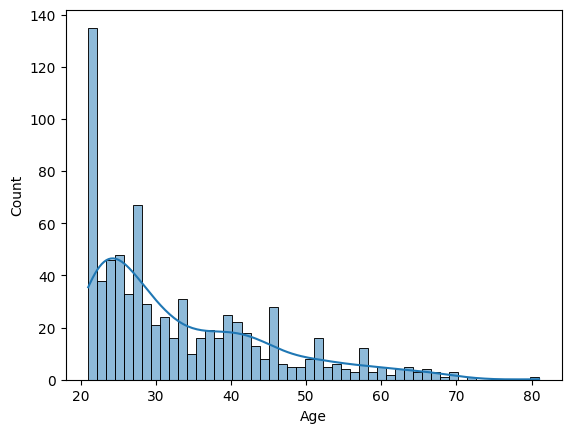

Pregnancies :

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64




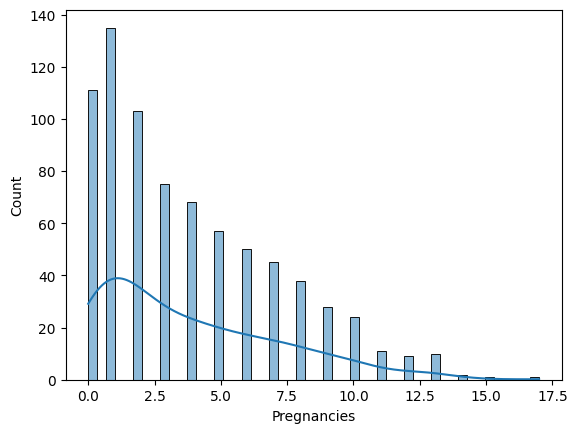

BMI :

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64




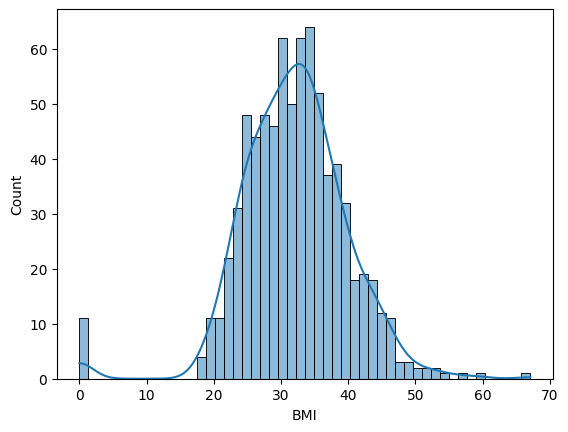

Glucose :

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64




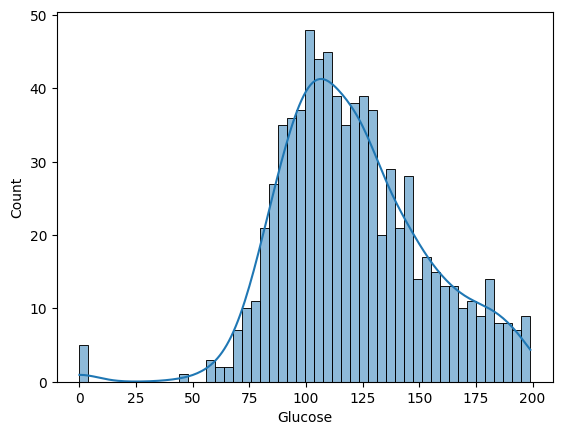

Insulin :

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64




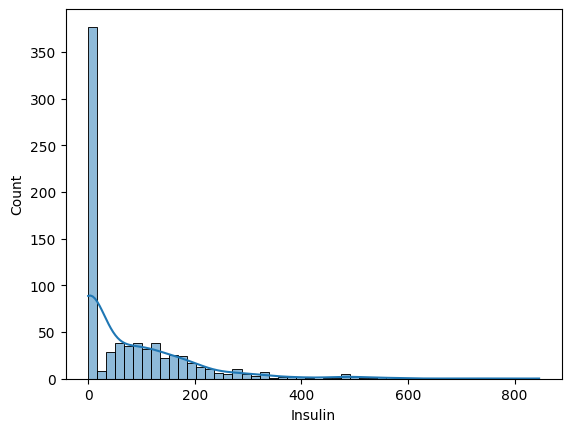

BloodPressure :

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64




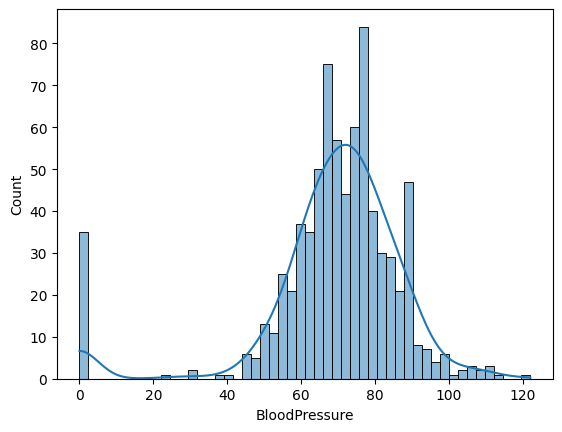

DiabetesPedigreeFunction :

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64




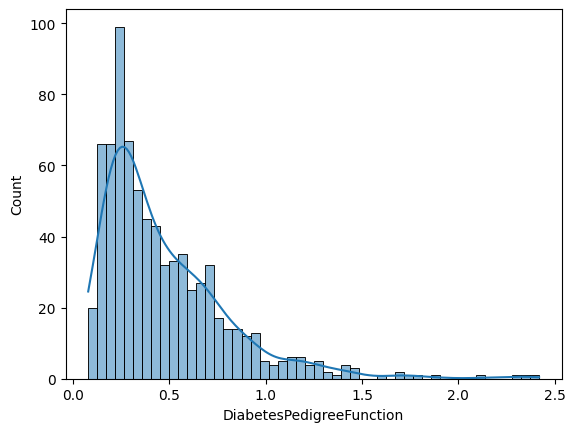

SkinThickness :

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64




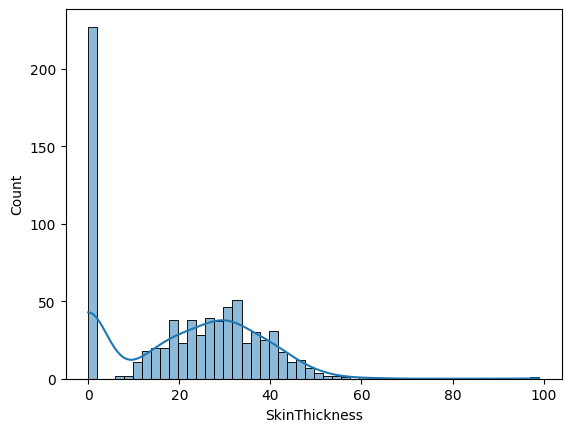

In [10]:
#Let's create both descriptive stats and histograms for numeric variables, try to list variables in order easy to comprehend: personal, history, clinical
nums=['Age', 'Pregnancies', 'BMI', 'Glucose', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins = 50, kde=True)
   plt.show()

Age :

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64




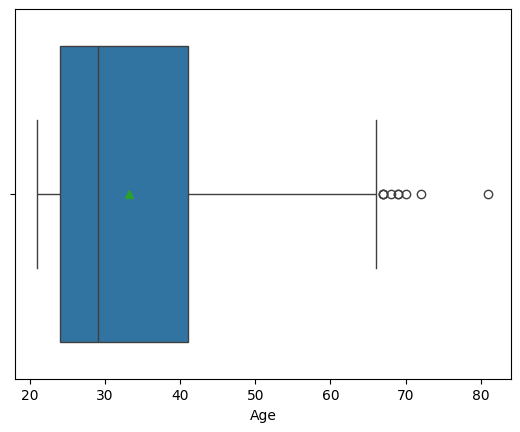

Pregnancies :

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64




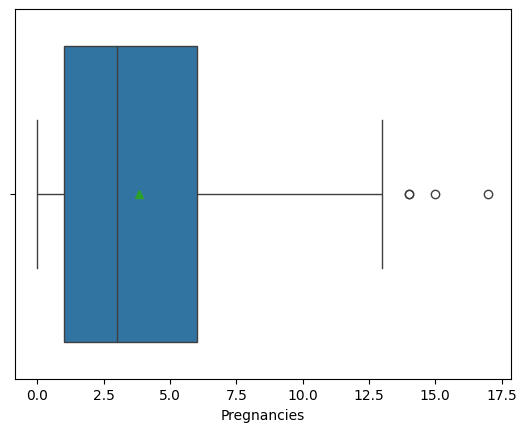

BMI :

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64




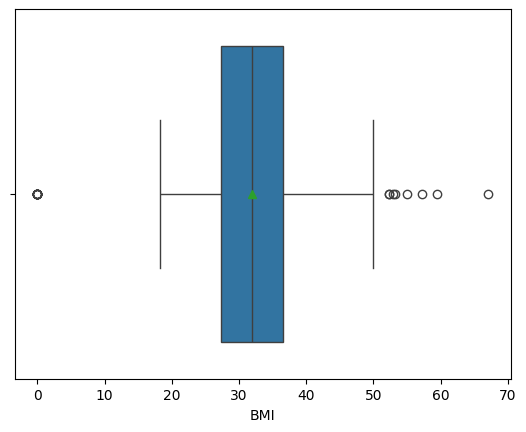

Glucose :

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64




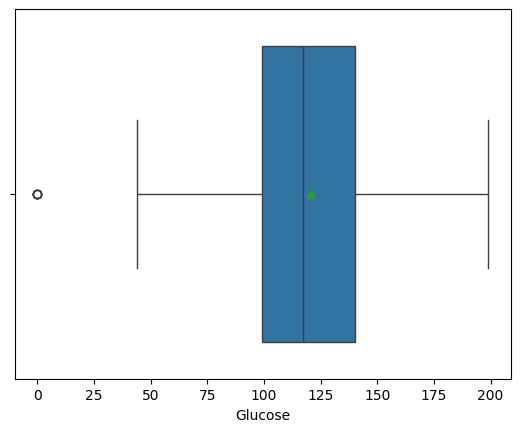

Insulin :

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64




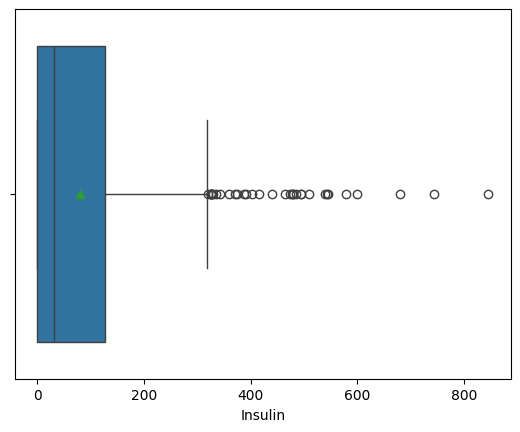

BloodPressure :

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64




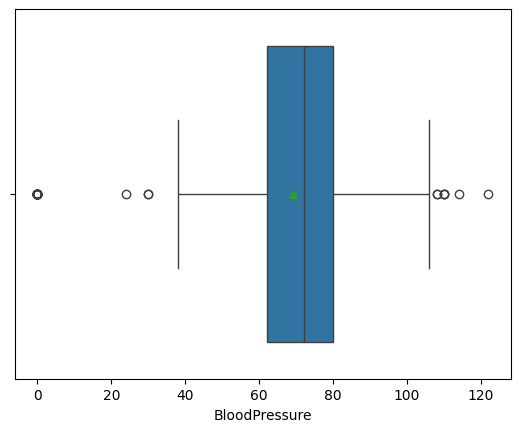

DiabetesPedigreeFunction :

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64




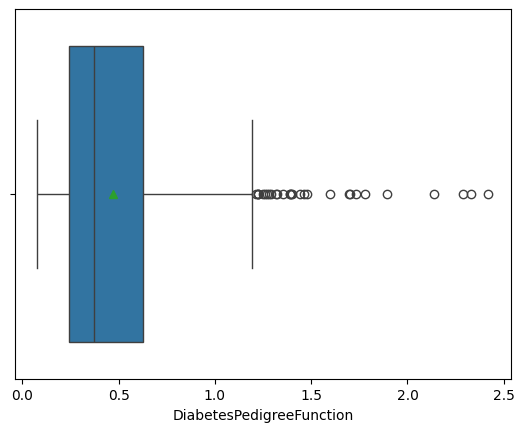

SkinThickness :

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64




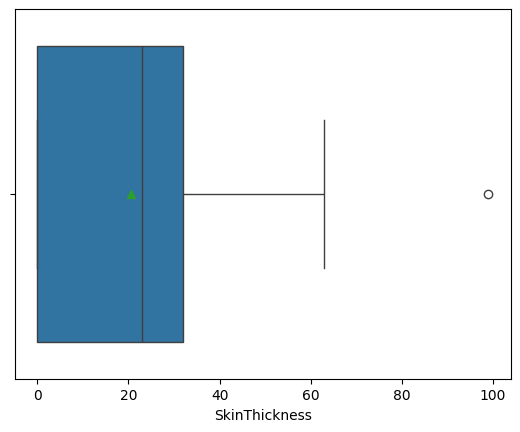

In [11]:
##Write your code to view the boxplots
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.boxplot(data=records, x=i, showmeans=True)
   plt.show()


<Axes: xlabel='Pregnancies', ylabel='count'>

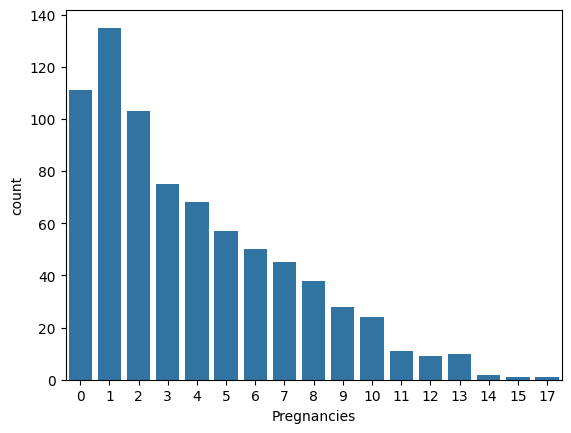

In [12]:
#Pregnancies is a numeric, but it is integer within a limited range, so it might be easier to view a countplot
sns.countplot(records, x='Pregnancies')

**Feature engineering: More on data conversion**

Sometimes, you need both analytical and creative skills to transform data into variables that can provide valuable insights. For instance, if you meet with  experts in gestational diabetes and you'd like to understand the impact of having no children, one child, or multiple children on the incidence of diabetes, you can create a new variable called "Child_Category."

In [13]:
# Create the 'Child_Category' column based on the 'Pregnancies' column
def categorize_children(num):
    if num == 0:
        return 'No children'
    elif num == 1:
        return 'One child'
    else:
        return 'More than one'

records['Child_Category'] = records['Pregnancies'].apply(categorize_children)


In [14]:
# We also want a numeric version
def categorize_children_numeric(num):
    if num == 0:
        return 0
    elif num == 1:
        return 1
    else:
        return 2

records['Child_Category_Numeric'] = records['Pregnancies'].apply(categorize_children_numeric)

In [15]:
records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Child_Category,Child_Category_Numeric
0,6,148,72,35,0,33.6,0.627,50,1,More than one,2
1,1,85,66,29,0,26.6,0.351,31,0,One child,1
2,8,183,64,0,0,23.3,0.672,32,1,More than one,2
3,1,89,66,23,94,28.1,0.167,21,0,One child,1
4,0,137,40,35,168,43.1,2.288,33,1,No children,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,More than one,2
764,2,122,70,27,0,36.8,0.340,27,0,More than one,2
765,5,121,72,23,112,26.2,0.245,30,0,More than one,2
766,1,126,60,0,0,30.1,0.349,47,1,One child,1


<Axes: xlabel='Child_Category', ylabel='count'>

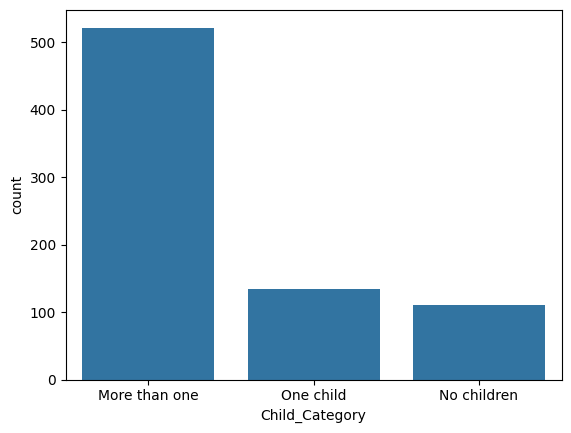

In [16]:
sns.countplot(data=records, x='Child_Category')

In [17]:
child_counts=records.value_counts('Child_Category')
child_counts

Child_Category
More than one    522
One child        135
No children      111
Name: count, dtype: int64

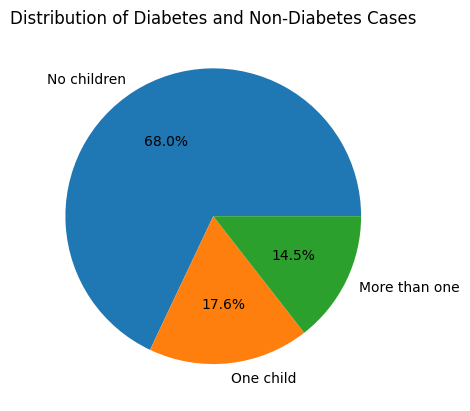

In [18]:
#Let's generate a pie chart with the distribution of diabetes and non-diabetes cases, along with percentage labels.

child_labels = ['No children', 'One child', 'More than one']
plt.pie(child_counts, labels=child_labels, autopct='%1.1f%%')
plt.title('Distribution of Diabetes and Non-Diabetes Cases')
plt.show()

**Explore bivariable relationships between each numeric variable against the categorical target**

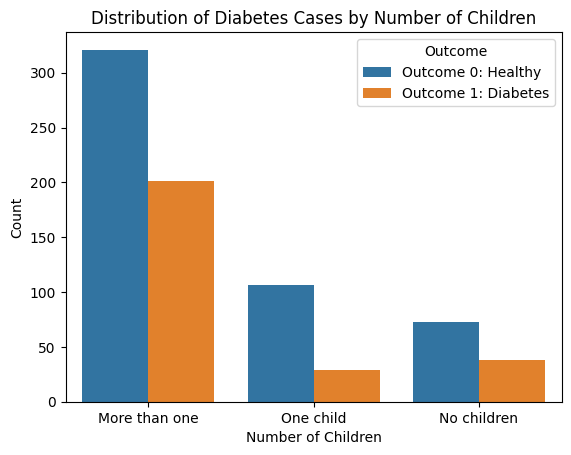

In [19]:
# Examine the relationship between Outcome and Child_Category
sns.countplot(data=records, hue='Outcome', x='Child_Category')

# Add labels
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Cases by Number of Children')
plt.legend(title='Outcome', labels=['Outcome 0: Healthy', 'Outcome 1: Diabetes'])

plt.show()

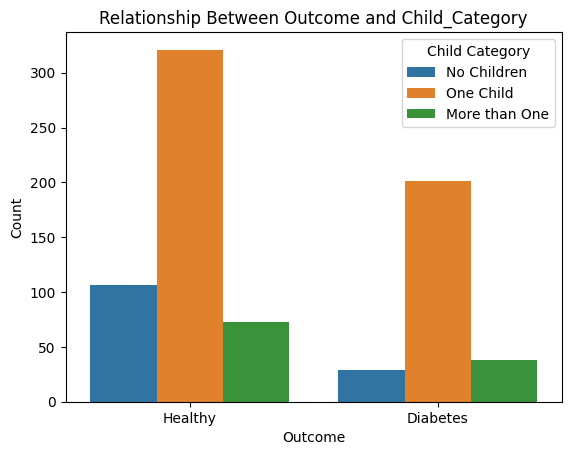

In [20]:
# Examine the relationship between Outcome and Child_Category
sns.countplot(data=records, x='Outcome', hue='Child_Category')

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Relationship Between Outcome and Child_Category')

# Customise legend and x-axis tick labels
plt.legend(title='Child Category', labels=['No Children', 'One Child', 'More than One'])
plt.xticks(ticks=[0, 1], labels=['Healthy', 'Diabetes'])

# Show the plot
plt.show()

Our observation suggests an association or correlation between the number of children and the prevalence of diabetes in the dataset. However, correlation does not imply causation. Just because there's a relationship doesn't mean one variable (the number of children) is causing the other variable (diabetes) to happen. There may be other factors, and diabetes maybe Type 1 and Type 2, so having children may not be a cause.

To establish causation, we would need more rigorous clinical/medical study designs.

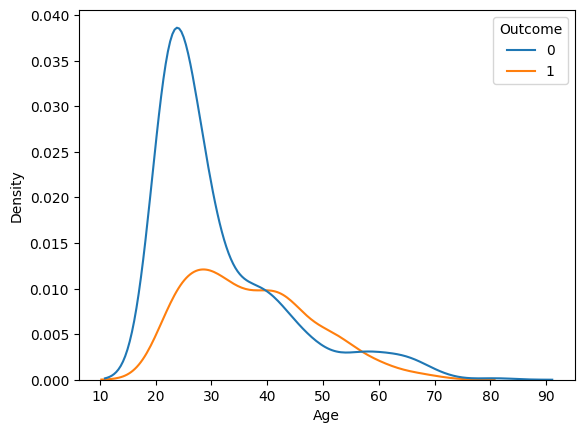

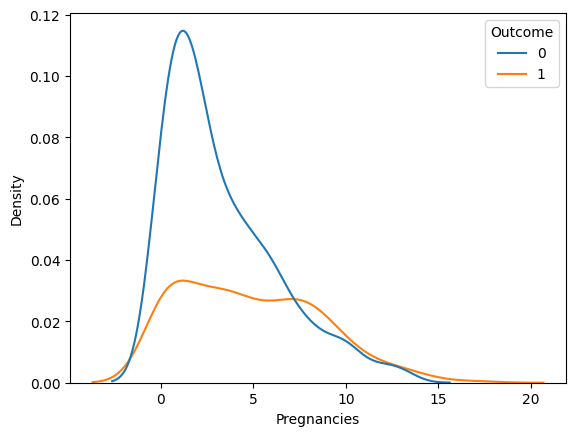

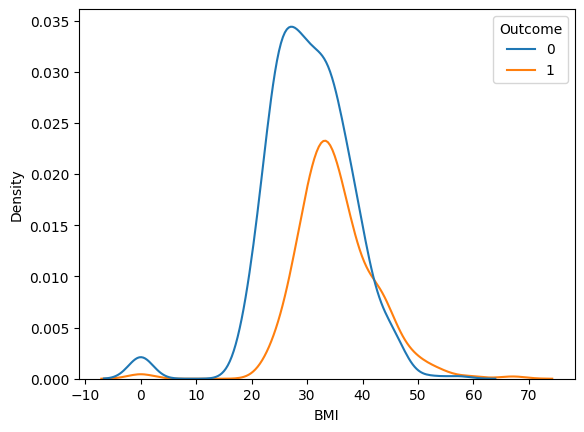

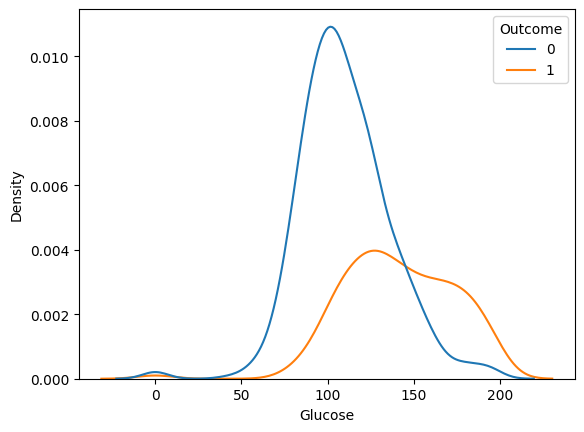

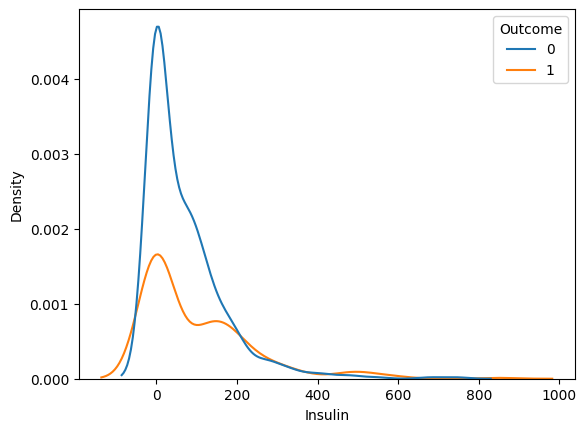

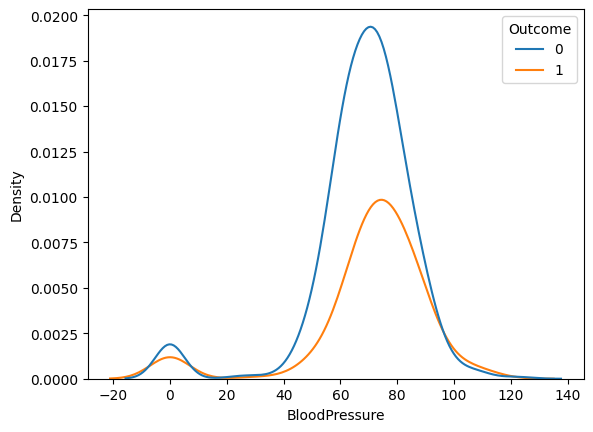

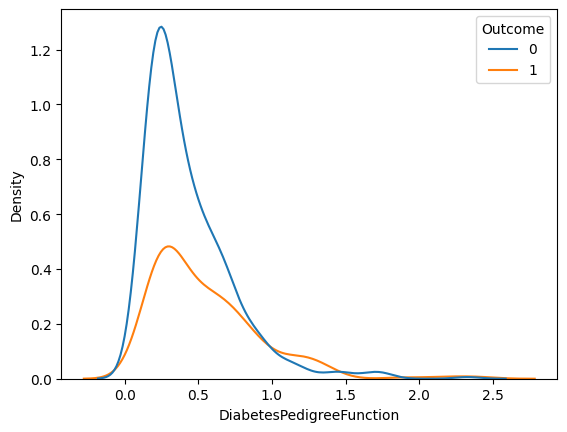

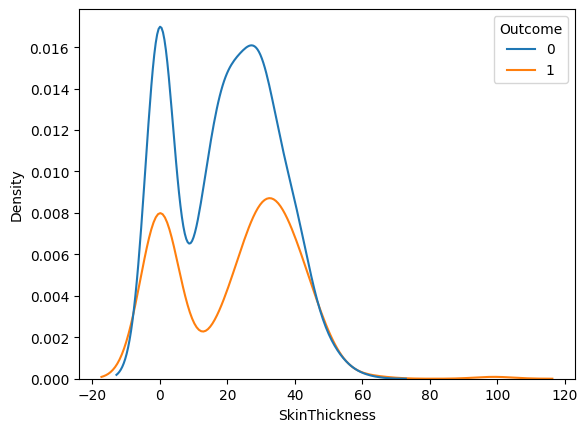

In [21]:
#Reuse the code above and break the distribution by the target
for i in nums:
   sns.kdeplot(data=records, x=i, hue='Outcome')
   plt.show()

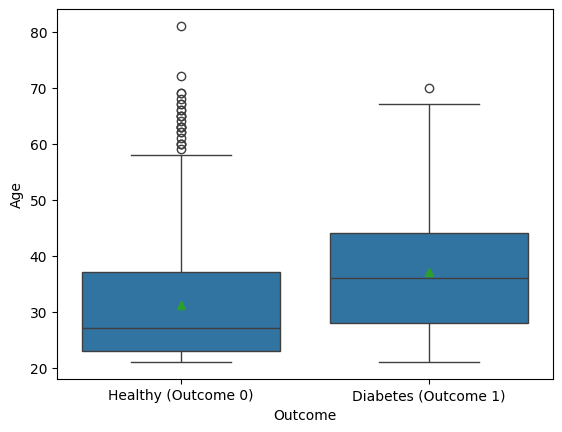

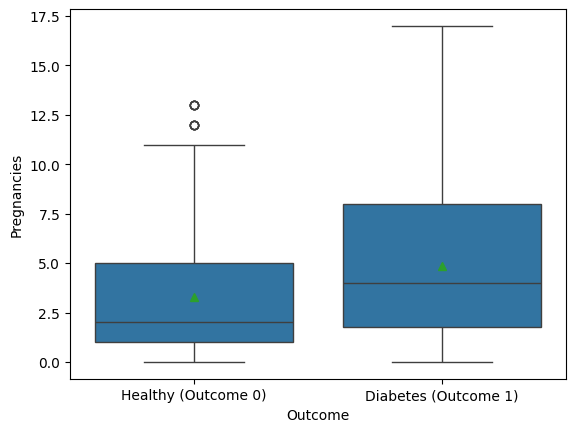

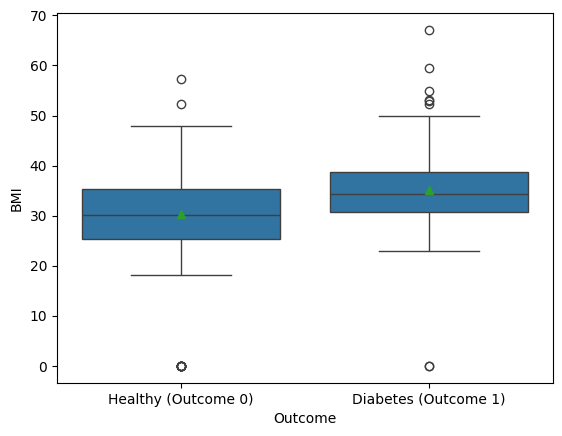

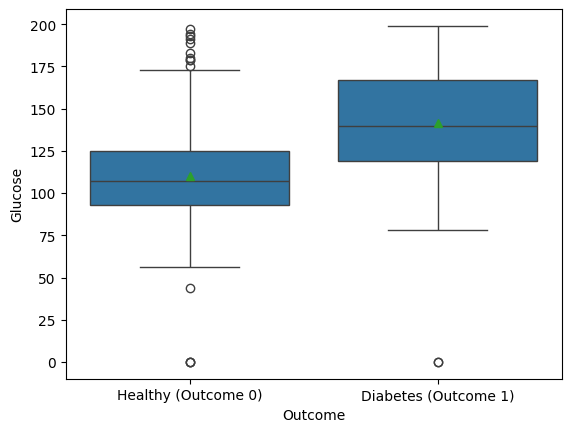

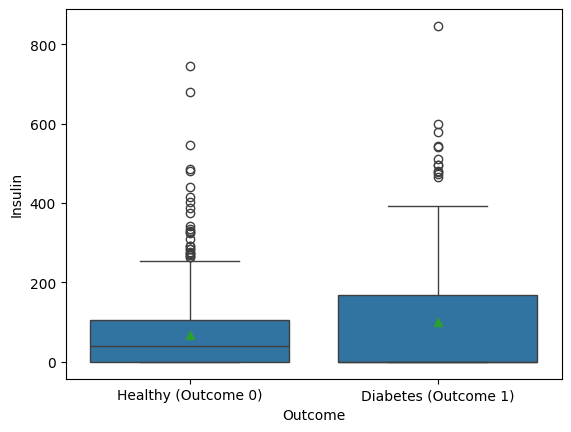

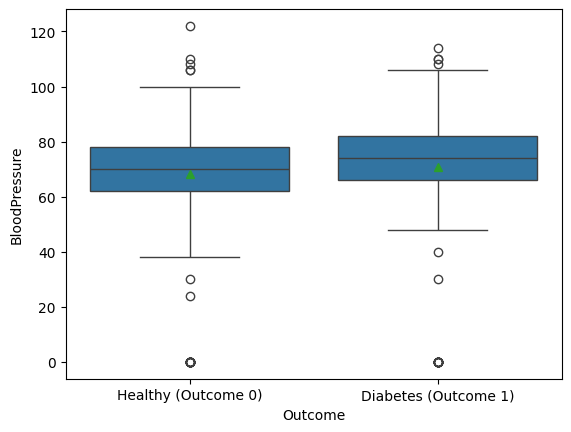

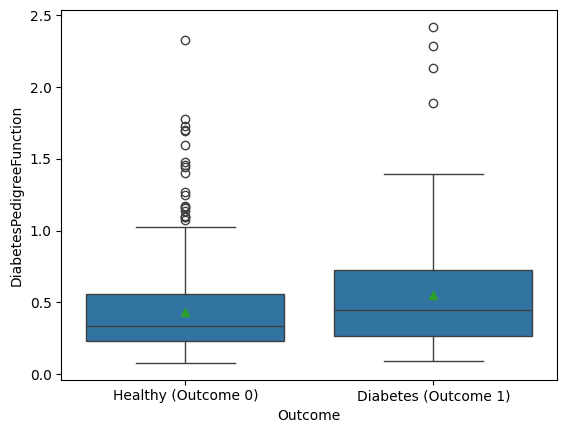

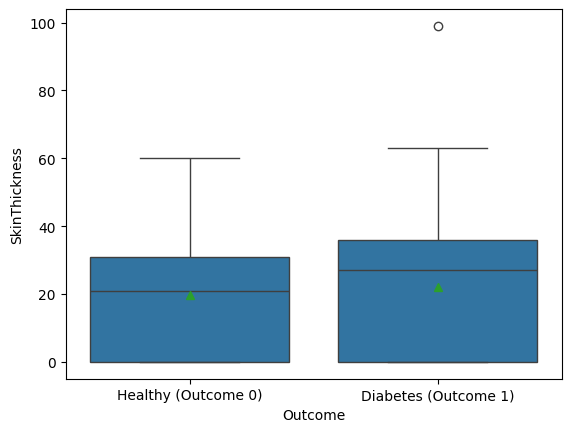

In [22]:
#Reuse the code above and break the distribution by the target
for i in nums:
   sns.boxplot(data=records, y=i, showmeans=True, x='Outcome')
   # Label x-ticks
   plt.xticks([0, 1], ['Healthy (Outcome 0)', 'Diabetes (Outcome 1)'])
   plt.show()

You may need to perform more bivariate and multivariable analyses depending on the datasets given to you, and domain expertise available. You may need to read previous reports/papers to inform your EDA.

**Multivariate analysis**

<Axes: >

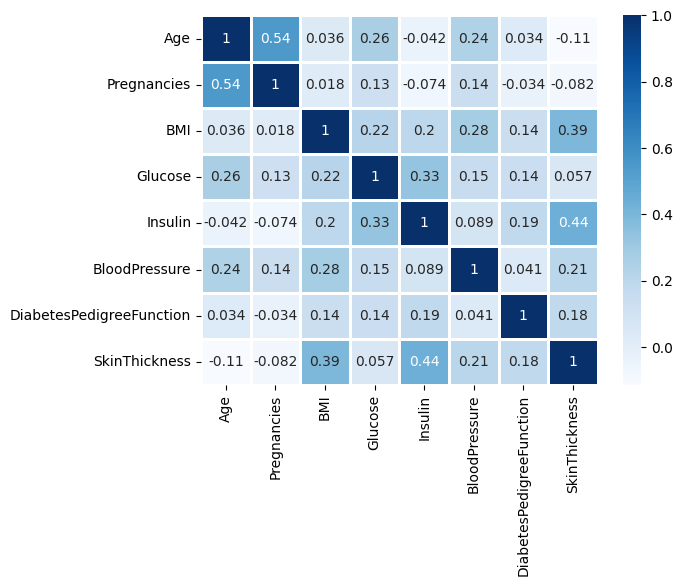

In [23]:
#visualise heatmap
sns.heatmap(data=records[nums].corr(), cmap="Blues",linewidths=.9, annot=True)

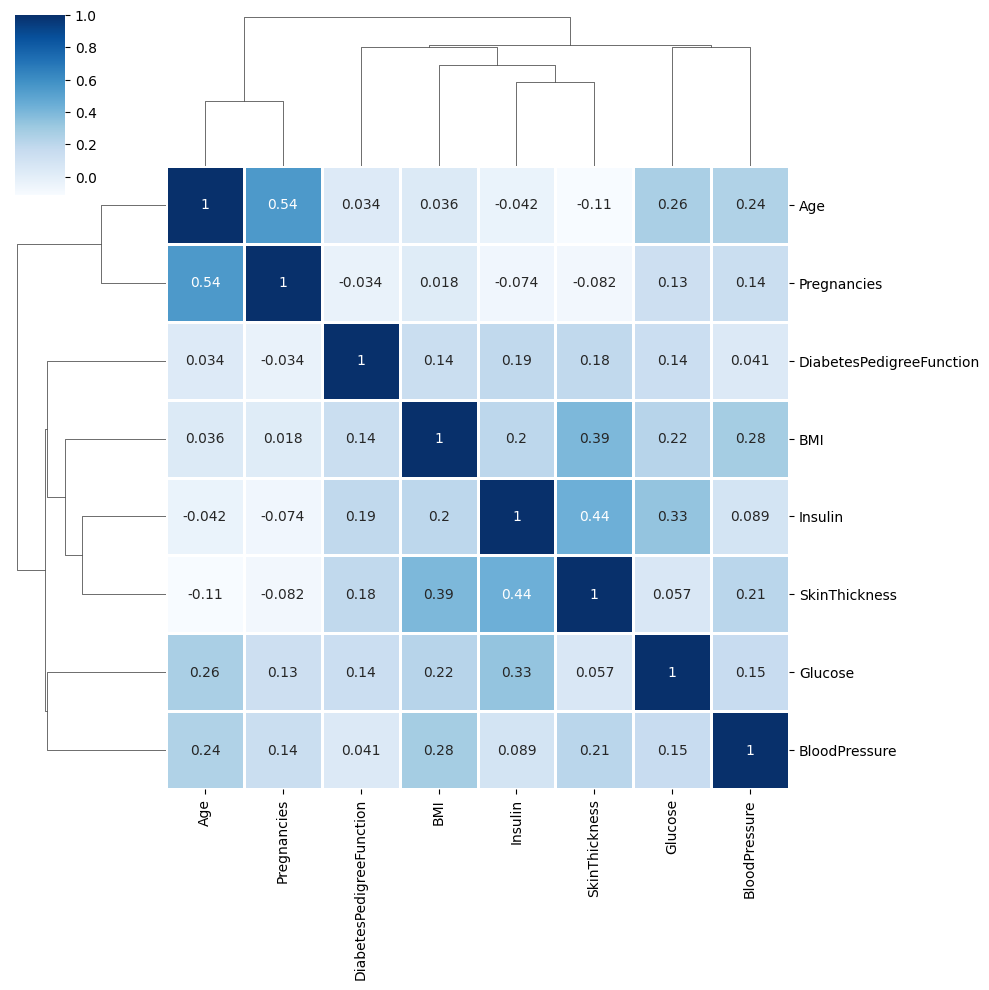

In [24]:
 #visualise clustermap
 sns.clustermap(data=records[nums].corr(), cmap="Blues",linewidths=.9, annot=True)

### **Data preparation**
* Data conversion
* Feature selection
* Target specification
* Data spliting
* Data scaling (X_train and X-test)

####**Select features and target specification**


In [25]:
#Define the predictors
features=['Age', 'Child_Category_Numeric', 'BMI', 'Glucose', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness' ]
X=records[features]
#Define the label
y=records['Outcome']
print(X.head())
print(y.head())

   Age  Child_Category_Numeric   BMI  Glucose  Insulin  BloodPressure  \
0   50                       2  33.6      148        0             72   
1   31                       1  26.6       85        0             66   
2   32                       2  23.3      183        0             64   
3   21                       1  28.1       89       94             66   
4   33                       0  43.1      137      168             40   

   DiabetesPedigreeFunction  SkinThickness  
0                     0.627             35  
1                     0.351             29  
2                     0.672              0  
3                     0.167             23  
4                     2.288             35  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


You can use Pregnancies as a feature. We want to show you how to scale some features, hence we include Child_Category_Numeric instead.

Sometime we scale only some features while keeping others unscaled. This is a common practice in machine learning when you want to maintain the interpretability of certain variables while optimizing others for model performance.

In many machine learning algorithms, especially those that rely on distance metrics like k-NN, or optimization algorithms like gradient descent in neural networks, feature scaling is essential for the model to perform well. However, some variables, like categorical ones or those that are already on a similar scale, might not need to be scaled.

####**Splitting and Scaling the feature data**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [28]:
# Features to scale
features_to_scale = ['Age', 'BMI', 'Glucose', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness' ]

# Features to keep
features_to_keep = ['Child_Category_Numeric']

In [29]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler(clip=True)


In [30]:
# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])
# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_train_scaled = pd.concat([X_train_scaled, X_train[features_to_keep].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[features_to_keep].reset_index(drop=True)], axis=1)


Note in the above code we use the same scaler learned from X_train to transform the X_test. To ensure the range we can use scaler = MinMaxScaler(clip=True). Be aware of potential information loss if the X_test has values outside the Min and Max of X_train.

If we don't use clip-True, we may have scaled values outside [0,1] but we avoid information loss.

In [31]:
X_train_scaled

,Age,BMI,Glucose,Insulin,BloodPressure,DiabetesPedigreeFunction,SkinThickness,Child_Category_Numeric
0,0.033333,0.496274,0.592965,0.138235,0.475410,0.078138,0.363636,1
1,0.166667,0.503726,0.869347,0.272059,0.639344,0.380871,0.393939,2
2,0.083333,0.518629,0.547739,0.145588,0.524590,0.353117,0.444444,2
3,0.333333,0.488823,0.286432,0.000000,0.655738,0.007686,0.373737,2
4,0.333333,0.573770,0.648241,0.000000,0.000000,0.096499,0.000000,2
...,...,...,...,...,...,...,...,...
609,0.116667,0.470939,0.819095,0.154412,0.573770,0.081127,0.181818,2
610,0.050000,0.663189,0.874372,0.176471,0.721311,0.242528,0.373737,2
611,0.366667,0.453055,0.713568,0.705882,0.737705,0.021349,0.242424,2
612,0.050000,0.563338,0.502513,0.154412,0.442623,0.179334,0.282828,2


## **1.3 Developing and Evaluate Decision Trees**

In [32]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [33]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

### **Base DT**

Decision Trees are generally not sensitive to the scale of input variables. They partition the dataset based on the values of the features, and these splits do not depend on the scale of the features. Therefore, we will use X_train and X_test for interpretability.


In [34]:
# Create Decision Tree classifer object
base_clf = DecisionTreeClassifier(random_state=2023)

##Write your code to train Decision Tree Classifer
base_clf = base_clf.fit(X_train, y_train)

##Write your code to predict the response for test dataset
y_pred_base = base_clf.predict(X_test)


In [35]:
#print confusion matrix
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[74 23]
 [19 38]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        97
           1       0.62      0.67      0.64        57

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [36]:
# calculate performance metrics for the base DT
accuracy_no_pruning = accuracy_score(y_test, y_pred_base)
precision_no_pruning = precision_score(y_test, y_pred_base)
recall_no_pruning = recall_score(y_test, y_pred_base)
f1_no_pruning = f1_score(y_test, y_pred_base)

print('DT without prunning: ')
print('Accuracy: ','%.2f' % accuracy_no_pruning)
print('Precision: ', '%.2f' % precision_no_pruning)
print('Recall: ',  '%.2f' % recall_no_pruning)
print('F1 scopre :',  '%.2f' % f1_no_pruning)

DT without prunning: 
Accuracy:  0.73
Precision:  0.62
Recall:  0.67
F1 scopre : 0.64


### **Pre Prune DT**

In [37]:
# Create Decision Tree classifer object
pre_pruned_clf = DecisionTreeClassifier(max_depth=15, max_features='sqrt', criterion='entropy', splitter='best', max_leaf_nodes=10, random_state=2023)

##Write your code to train Decision Tree Classifer
pre_pruned_clf = pre_pruned_clf.fit(X_train, y_train)

##Write your code to predict the response for test dataset
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)

In [38]:
#Wtite code to print confusion matrix for the pre-pruned DT
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[67 30]
 [18 39]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        97
           1       0.57      0.68      0.62        57

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.69       154



In [39]:
# calculate performance metrics for pre_pruned DT
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
precision_pre_pruned = precision_score(y_test, y_pred_pre_pruned)
recall_pre_pruned = recall_score(y_test, y_pred_pre_pruned)
f1_pre_pruned = f1_score(y_test, y_pred_pre_pruned)

print('DT pre pruned: ')
print('Accuracy: ','%.2f' % accuracy_pre_pruned)
print('Precision: ', '%.2f' % precision_pre_pruned)
print('Recall: ',  '%.2f' % recall_pre_pruned)
print('F1 scopre :',  '%.2f' % f1_pre_pruned)

DT pre pruned: 
Accuracy:  0.69
Precision:  0.57
Recall:  0.68
F1 scopre : 0.62


### **Post Prune DT**

ccp_alpha = 0 by default, minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

In [40]:
# Post-prune the decision tree
path = base_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha
decision_trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(max_depth=20, criterion='entropy', max_leaf_nodes=20, random_state=2023, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    decision_trees.append(dt)

# Find the decision tree with the highest accuracy on the validation data
recall_scores = [recall_score(y_test, dt.predict(X_test)) for dt in decision_trees]
post_pruned_clf = decision_trees[recall_scores.index(max(recall_scores))]

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test)


In [41]:
##Write your code to print confusion matrix
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[68 29]
 [17 40]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        97
           1       0.58      0.70      0.63        57

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [42]:
##Write your code to calculate performance metrics for post_pruned DT
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)

print('DT post prunning: ')
print('Accuracy: ','%.2f' % accuracy_post_pruned)
print('Precision: ', '%.2f' % precision_post_pruned)
print('Recall: ',  '%.2f' % recall_post_pruned)
print('F1 scopre :',  '%.2f' % f1_post_pruned)

DT post prunning: 
Accuracy:  0.70
Precision:  0.58
Recall:  0.70
F1 scopre : 0.63


## **1.4 Model Comparison**

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
#Base DT get predicted probabilities for the main class
y_pred_probs_base = base_clf.predict_proba(X_test)
y_pred_probs_base = y_pred_probs_base[:, 1]

#Pre pruned DT get predicted probabilities for the main class
y_pred_probs_pre = pre_pruned_clf.predict_proba(X_test)
y_pred_probs_pre = y_pred_probs_pre[:, 1]

#Post pruned DT get predicted probabilities for the main class
y_pred_probs_post = post_pruned_clf.predict_proba(X_test)
y_pred_probs_post = y_pred_probs_post[:, 1]

In [45]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred_probs_base)
auc_base=metrics.auc(fpr_base, tpr_base)

fpr_pre_pruned, tpr_pre_pruned, thresholds_pre_pruned = roc_curve(y_test, y_pred_probs_pre)
auc_pre_pruned=metrics.auc(fpr_pre_pruned, tpr_pre_pruned)

fpr_post_pruned, tpr_post_pruned, thresholds_post_pruned = roc_curve(y_test, y_pred_probs_post)
auc_post_pruned=metrics.auc(fpr_post_pruned, tpr_post_pruned)

In [46]:
#run the below if you have problem with 'str' object is not callable - some variable is taken a built in function
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

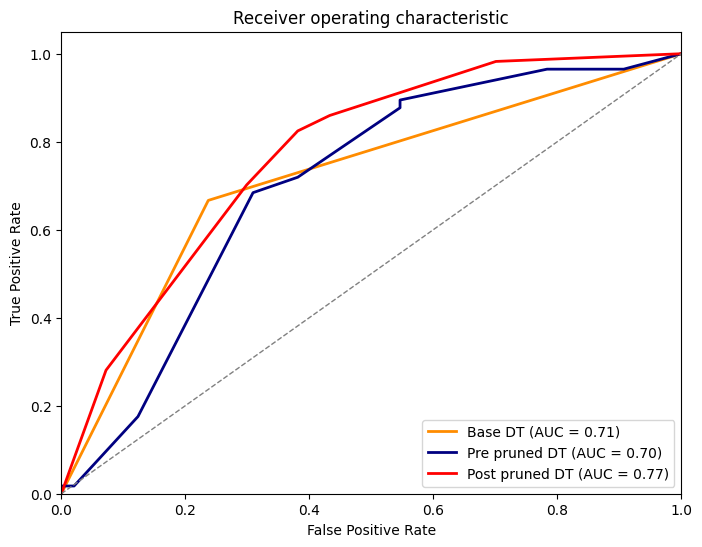

Base DT  AUC: 0.71
Pre pruned DT  AUC: 0.70
Post pruned DT  AUC: 0.77


In [47]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='darkorange', lw=2, label='Base DT (AUC = %0.2f)' % auc_base)
plt.plot(fpr_pre_pruned, tpr_pre_pruned, color='navy', lw=2, label='Pre pruned DT (AUC = %0.2f)' % auc_pre_pruned)
plt.plot(fpr_post_pruned, tpr_post_pruned, color='red', lw=2, label='Post pruned DT (AUC = %0.2f)' % auc_post_pruned)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Base DT  AUC:','%.2f' %  auc_base)
print('Pre pruned DT  AUC:','%.2f' %  auc_pre_pruned)
print('Post pruned DT  AUC:','%.2f' %  auc_post_pruned)

In [48]:
#print confusion matrix for the base DT
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[74 23]
 [19 38]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        97
           1       0.62      0.67      0.64        57

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [49]:
#print confusion matrix for the pre-pruned DT
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[67 30]
 [18 39]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        97
           1       0.57      0.68      0.62        57

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.69       154



In [50]:
#print confusion matrix for the post_pruned DT
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[68 29]
 [17 40]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        97
           1       0.58      0.70      0.63        57

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [51]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text

In [52]:
# Extract the base decision rules
rules = export_text(base_clf, feature_names=features)
print(rules)

|--- Glucose <= 147.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- Glucose <= 127.50
|   |   |   |   |--- BMI <= 30.95
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  30.95
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.96
|   |   |   |   |   |   |--- Glucose <= 106.50
|   |   |   |   |   |   |   |--- BMI <= 31.10
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- BMI >  31.10
|   |   |   |   |   |   |   |   |--- BloodPressure <= 83.50
|   |   |   |   |   |   |   |   |   |--- SkinThickness <= 41.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Sk

In [53]:
# Extract the pre_pruned decision rules
rules = export_text(pre_pruned_clf, feature_names=features)
print(rules)

|--- BMI <= 27.85
|   |--- Child_Category_Numeric <= 1.50
|   |   |--- class: 0
|   |--- Child_Category_Numeric >  1.50
|   |   |--- Glucose <= 148.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  148.50
|   |   |   |--- class: 1
|--- BMI >  27.85
|   |--- Insulin <= 179.00
|   |   |--- Age <= 30.50
|   |   |   |--- SkinThickness <= 32.50
|   |   |   |   |--- BMI <= 42.30
|   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  22.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  42.30
|   |   |   |   |   |--- Glucose <= 125.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Glucose >  125.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- SkinThickness >  32.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  30.50
|   |   |   |--- class: 1
|   |--- Insulin >  179.00
|   |   |--- class: 1



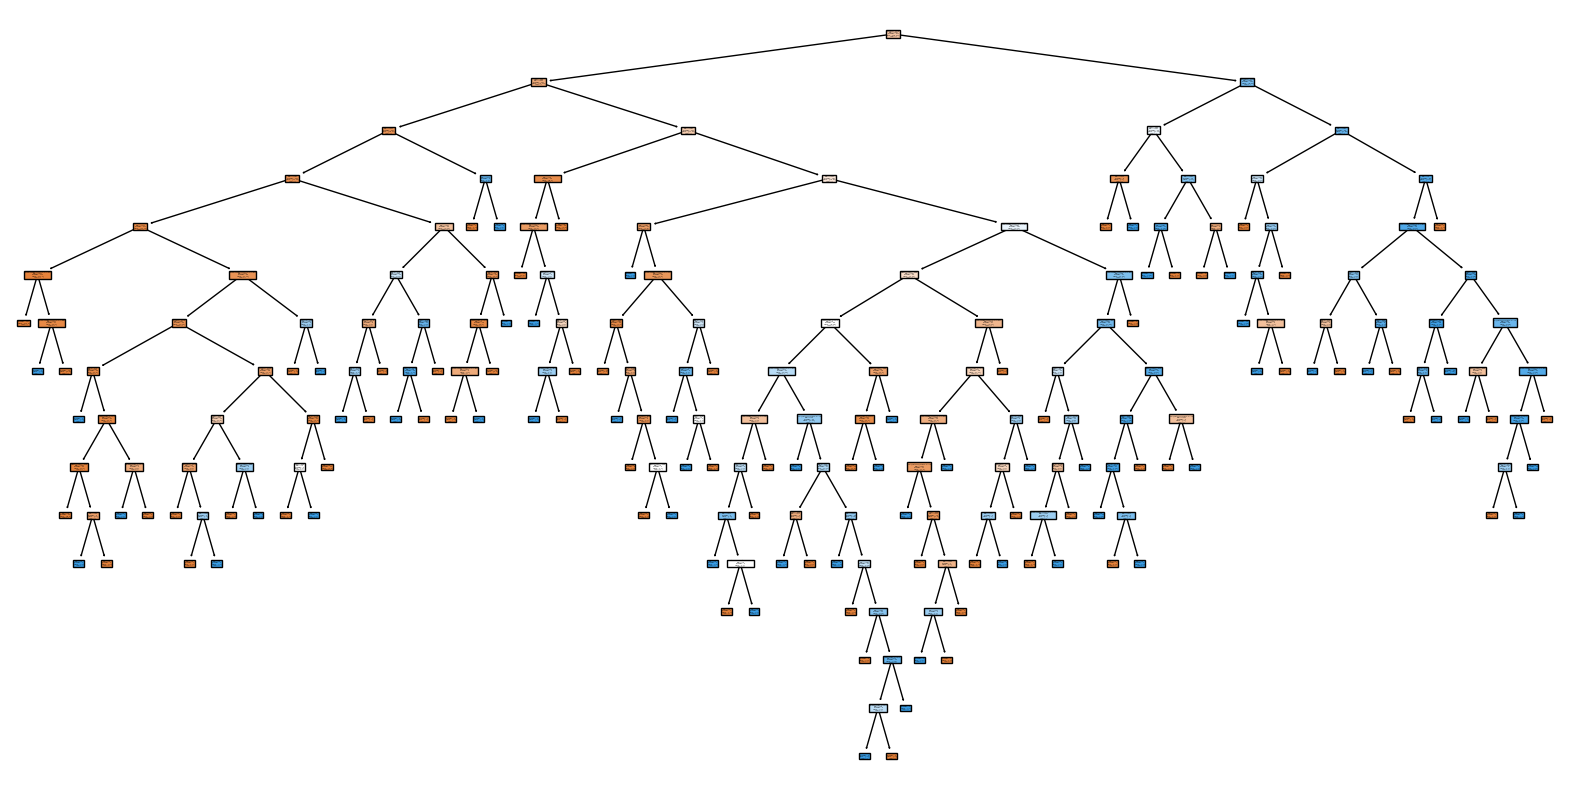

In [54]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(base_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

In [55]:
#Import libraries and classes; do this if we skip Case 1

import six
import sys
sys.modules['sklearn.externals.six'] = six

from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [56]:
#Visualise the decision tree
dot_data = StringIO()
export_graphviz(base_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabestes post DT.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

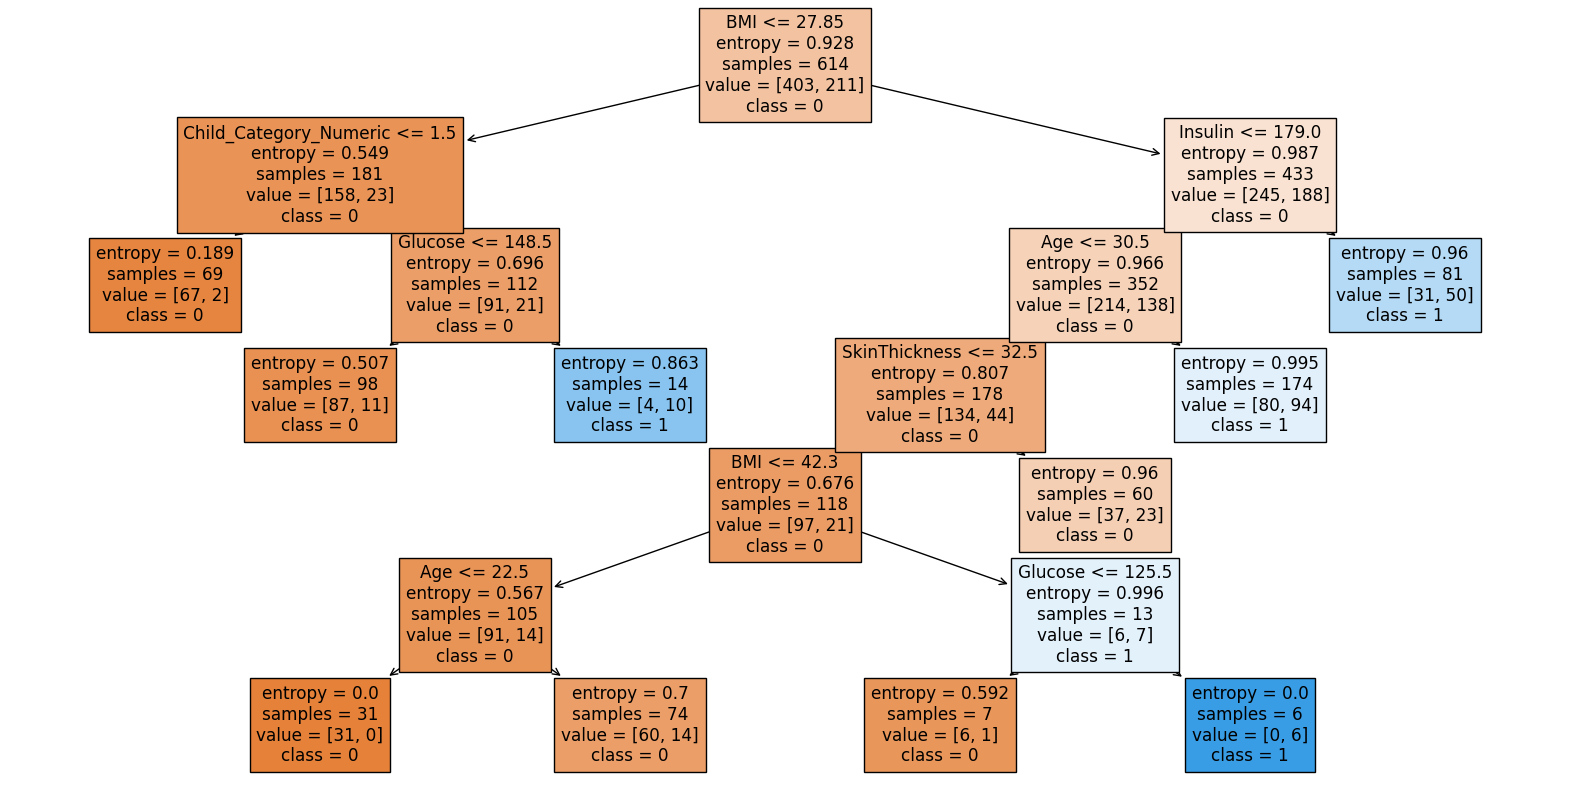

In [57]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

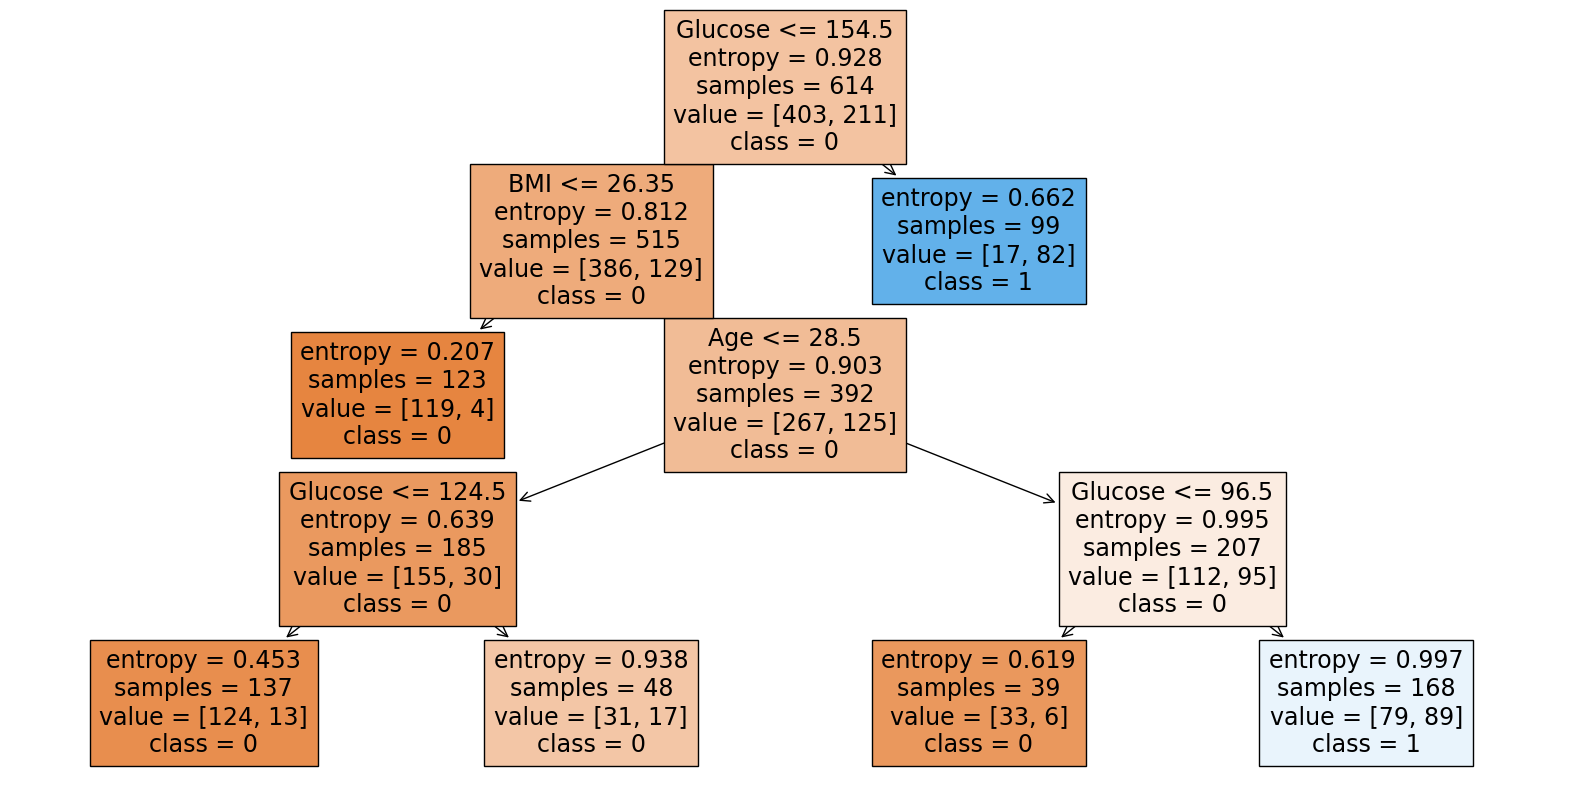

In [58]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(post_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

## **1.5 . Cross Validation**

### **K-fold cross validation**

In [59]:
#Import cross validation function
from sklearn.model_selection import cross_val_score

We use the t-distribution to calculate the confidence interval because the distribution of the cross-validation scores may not be perfectly normal. The t-distribution is similar to the normal distribution but has fatter tails, which makes it more appropriate for small sample sizes.


In [60]:
# Calculate the 95% confidence interval of the mean F1 score
def get_95ci(metric):
  n = len(metric)
  se = metric.std() / np.sqrt(n)
  t=2.262  # t-value for 95% CI and n-1 degrees of freedom, 10 folders
  ci = t * se
  return ci

In [61]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(post_pruned_clf, X, y, cv=10)
f1 = cross_val_score(post_pruned_clf, X, y, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))


Accuracy scores: 0.737 (+/- 0.027)
F1 scores: 0.591 (+/- 0.070)


In [62]:
get_95ci(accuracy)

0.02655493827362632

In [63]:
accuracy

array([0.74025974, 0.72727273, 0.71428571, 0.67532468, 0.7012987 ,
       0.77922078, 0.75324675, 0.80519481, 0.71052632, 0.76315789])

In [64]:
f1

array([0.56521739, 0.53333333, 0.67647059, 0.52830189, 0.37837838,
       0.70175439, 0.66666667, 0.69387755, 0.52173913, 0.64      ])

### **Leave one out and Leave P out cross validation**

In [65]:
#import leave one out
from sklearn.model_selection import LeaveOneOut
#import LeavePOut
from sklearn.model_selection import LeavePOut

In [66]:
loocv = LeaveOneOut()
accuracy = cross_val_score(pre_pruned_clf, X_test_scaled, y_test, cv=loocv, scoring='accuracy')

# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 0.773 (+/- 0.076)


In LPO, you leave out 'p' observations (for example p=2 in the below example) from the training set and use these 'p=2' observations as your validation set. This is done for each unique combination of 'p=2' observations that can be left out of the full dataset. Therefore, the number of total combinations can get very large for even moderate sizes of your dataset, making this method computationally intensive.

In [67]:
lpo = LeavePOut(p=2)
accuracy = cross_val_score(pre_pruned_clf, X_test, y_test, cv=lpo)



Even p=2 took us 55s to run the above, how long did it take you?

In [68]:
# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 0.732 (+/- 0.007)


## **1.6. Ensemble learning for Classification**

### **Boostrap Aggregation**

In [69]:
#Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [70]:
base_clf = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2023)

# Define the ensemble classifier using bagging
ensemble_classifier = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=2023)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_baggedtrees = ensemble_classifier.predict(X_test)

In [71]:
print(confusion_matrix(y_test, y_pred_baggedtrees))
print(classification_report(y_test, y_pred_baggedtrees))

[[84 13]
 [26 31]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.70      0.54      0.61        57

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



### **Random Forest**

In [72]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Structure a random forest model with 100 decision trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=2023)

##Write your code to train the model on the training set
rf_clf.fit(X_train, y_train)

##Write your code to make predictions y_pred_rf=
y_pred_rf = rf_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=10)
print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean(): .3f}")
print(f"Std. dev. of CV accuracy: {cv_scores.std(): .3f}")

[[85 12]
 [22 35]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.74      0.61      0.67        57

    accuracy                           0.78       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.78      0.77       154

Cross-validation scores: [0.68831169 0.81818182 0.74025974 0.7012987  0.68831169 0.80519481
 0.79220779 0.80519481 0.68421053 0.80263158]
Mean CV accuracy:  0.753
Std. dev. of CV accuracy:  0.054


### **Stacking**

In [74]:
#Import classes and functions
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report


Now that we use KNN, you might want to review how we scaled the data, let's use X_trained_scaled and X_test_scaled

In [75]:
# Define base models
estimators = [
    ('ann', MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000))
]


# Define the meta-classifier for the stacking ensemble
meta_classifier = LogisticRegression()



In [76]:
# Build the stacking ensemble model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)


In [77]:
# Train the stacking ensemble model on the training set
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('ann',
                                MLPClassifier(hidden_layer_sizes=(32, 16),
                                              max_iter=1000)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression())

In [78]:
# Evaluate the stacking ensemble model on the testing set
y_pred_stacked = stacking_model.predict(X_test_scaled)

In [79]:
print(confusion_matrix(y_test, y_pred_stacked))
print(classification_report(y_test, y_pred_stacked))

[[84 13]
 [24 33]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        97
           1       0.72      0.58      0.64        57

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154



In [80]:
accuracy = accuracy_score(y_test, y_pred_stacked)
print(f'Accuracy: {accuracy: .3f}')

Accuracy:  0.760


In [81]:
# Evaluate the stacking model using 10-fold cross validation
scores = cross_val_score(stacking_model, X, y, cv=10, scoring='accuracy')
print("Accuracy: {:.3f} (+/- {:.3f})".format(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.762 (+/- 0.065)


Note while stacking is a technique that combines multiple classifiers to improve performance, it's not a guaranteed "silver bullet" for all classification problems.  For example,  if the base models are poorly designed or misconfigured, then the stacking model is unlikely to perform well. If the base models make similar mistakes, the stacking model may not offer significant improvements.

Remember, the effectiveness of a model should be judged based on the specific performance metrics that are critical for your application, such as precision, recall, F1-score, or ROC AUC, rather than just accuracy.

**Congratulations!**

Now your next task is to do it on your own!

## **1.7 OPTIONAL: KNN classifier**

Let's practice KNN and post-processing to optimise k and threshold; then perform cross validation

####**KNN Model building**

In [82]:
from sklearn.neighbors import KNeighborsClassifier

#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [83]:
# Train a KNN model
k = 19 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test_scaled)


#### **KNN model Evaluation**

In [84]:
# Print the classification report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[86 11]
 [35 22]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        97
           1       0.67      0.39      0.49        57

    accuracy                           0.70       154
   macro avg       0.69      0.64      0.64       154
weighted avg       0.69      0.70      0.68       154



#### **Model Optimisation**

Best k value: 7
Best accuracy: 0.721


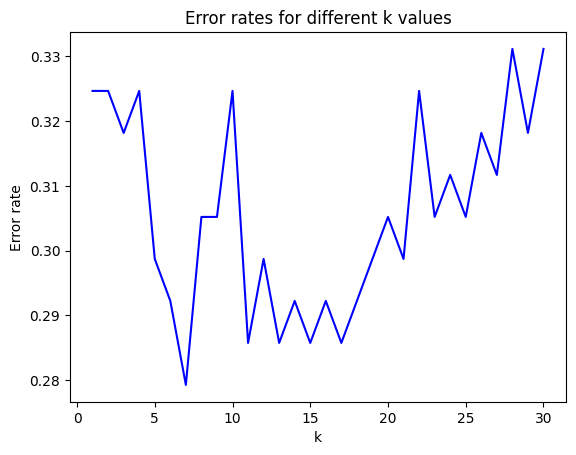

In [85]:
# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

In [86]:
# Train a KNN model
k = 7 # Number of neighbors
knn_bestk = KNeighborsClassifier(n_neighbors=k)
knn_bestk.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_bestk = knn_bestk.predict(X_test_scaled)

In [87]:
#print confusion matrix
print(confusion_matrix(y_test, y_pred_bestk))
print(classification_report(y_test, y_pred_bestk))

[[82 15]
 [28 29]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79        97
           1       0.66      0.51      0.57        57

    accuracy                           0.72       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



In [88]:
#print confusion matrix for the best thredhold
print(confusion_matrix(y_test, y_pred_bestk))
print(classification_report(y_test, y_pred_bestk))

[[82 15]
 [28 29]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79        97
           1       0.66      0.51      0.57        57

    accuracy                           0.72       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



In [89]:
#get predicted probabilities for the main class
y_pred_probs_bestk = knn_bestk.predict_proba(X_test_scaled)
y_pred_probs_bestk = y_pred_probs_bestk[:, 1]
print(y_pred_probs_bestk)

[0.28571429 0.71428571 0.14285714 0.         0.14285714 0.71428571
 0.14285714 0.57142857 0.42857143 0.14285714 0.42857143 0.14285714
 0.28571429 0.57142857 0.57142857 0.28571429 0.42857143 0.28571429
 0.57142857 0.14285714 0.28571429 0.85714286 0.         0.71428571
 0.42857143 0.28571429 0.28571429 0.42857143 0.85714286 0.85714286
 0.14285714 0.71428571 0.28571429 0.         0.71428571 0.
 0.28571429 0.14285714 0.         0.28571429 0.42857143 0.85714286
 0.71428571 0.14285714 0.57142857 0.28571429 0.14285714 0.57142857
 0.         0.57142857 0.14285714 0.42857143 0.71428571 0.28571429
 0.85714286 0.14285714 0.42857143 0.         0.85714286 0.57142857
 0.57142857 0.57142857 0.         0.28571429 0.         0.42857143
 0.14285714 0.85714286 0.         0.57142857 0.         0.14285714
 0.42857143 0.28571429 0.28571429 0.14285714 0.14285714 0.71428571
 0.57142857 0.57142857 0.         0.         0.42857143 0.
 0.14285714 0.28571429 0.57142857 0.14285714 0.42857143 0.28571429
 0.42857143

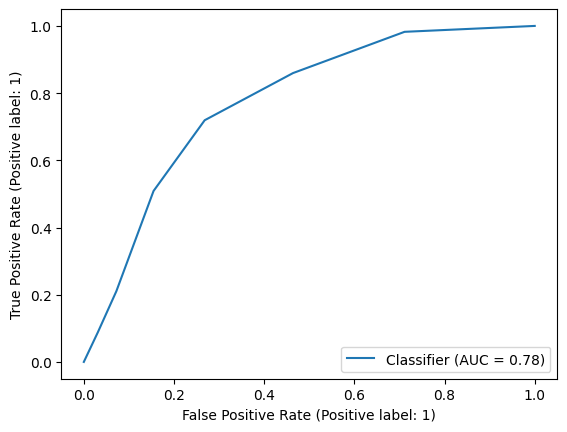

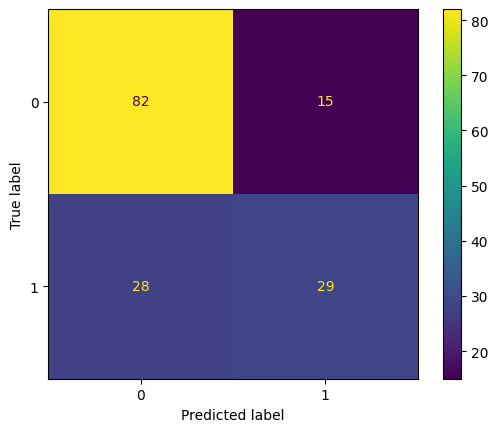

In [90]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs_bestk)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bestk)
plt.show()

**Find the best threshold**

AUC: 0.775


<Axes: >

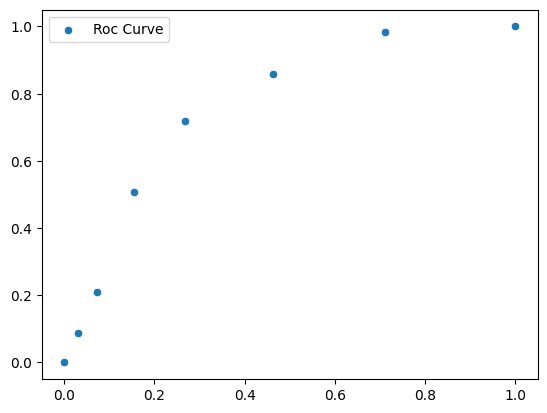

In [91]:
#get fpr, tpr, thredholds and AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_bestk)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

In [92]:
#from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

# print the best threshold and the highest AUC score on the test data
print('Best threshold:', best_threshold)


0.42857142857142855
Best threshold: 0.42857142857142855


In [93]:
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_bestk]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.42857142857142855


In [94]:
#get predicted probabilities for the main class
y_pred_best = (knn_bestk.predict_proba(X_test_scaled)[:,1] >= best_threshold).astype(bool)

In [95]:
# Print the classification report for the best thredhold
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[71 26]
 [16 41]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        97
           1       0.61      0.72      0.66        57

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.74      0.73      0.73       154



In [96]:
#Model evaluation
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred_best))
print("Precision: ", metrics.precision_score(y_test,y_pred_best))
print("Recall: ", metrics.recall_score(y_test,y_pred_best))
print("F1: ", metrics.f1_score(y_test,y_pred_best))


Accuracy:  0.7272727272727273
Precision:  0.6119402985074627
Recall:  0.7192982456140351
F1:  0.6612903225806452


#### **Cross Validation**

In [97]:
#Import cross validation function
from sklearn.model_selection import cross_val_score
#import leave one out
from sklearn.model_selection import LeaveOneOut
#import LeavePOut
from sklearn.model_selection import LeavePOut

In [98]:
# Perform 10-fold cross-validation
accuracy= cross_val_score(knn_bestk, X, y, cv=10)
f1 = cross_val_score(knn_bestk, X, y, cv=10, scoring=('f1'))

# Print the mean accuracy scores and 95%CI of the scores
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Print the mean F1 scores and 95%CI of the scores
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.741 (+/- 0.036)
F1 scores: 0.596 (+/- 0.059)


In [99]:
loocv = LeaveOneOut()
accuracy = cross_val_score(knn_bestk, X_test_scaled, y_test, cv=loocv, scoring='accuracy')

# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 0.708 (+/- 0.083)


In [100]:

# Perform leave-p-out cross-validation with p=2
lpo = LeavePOut(p=2)
accuracy = cross_val_score(knn_bestk, X_test, y_test, cv=lpo)

# Print the mean accuracy and standard deviation of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.682 (+/- 0.655)


# **2. Task 2: KNN regression**

**KNN regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?

## **2.1 Load and inspect data, perform EDA and data preparation**

In [101]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'


In [102]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Inspecting and cleansing data**
* Inspect columns
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


In [103]:
##Write your code to inspect data size and types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
##Write your code to inspect missing data, e.g. isnull().sum()
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.

**Explore the relationships between the target variable and other variables, and explore the relationships among the non-target variables as well**

**Inspect the target variable**

In [105]:
##Write your code to show descriptive stats for the target variable (DV - dependant variable)
records.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

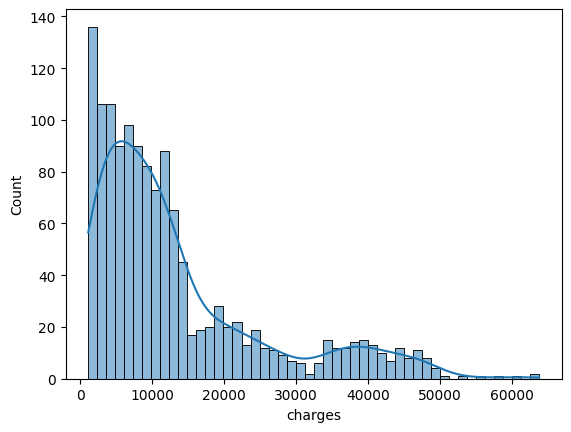

In [106]:
sns.histplot(data=records, x='charges', bins=50, kde=True)

<Axes: xlabel='charges'>

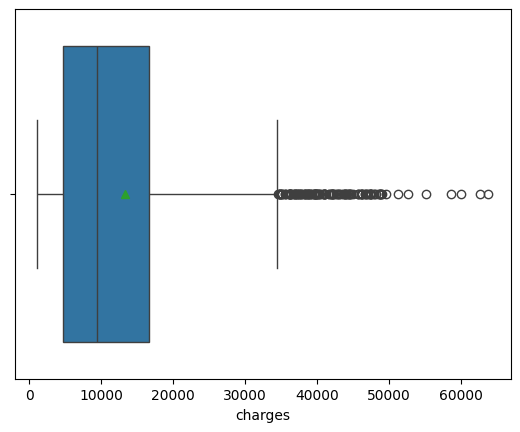

In [107]:
sns.boxplot(data=records, x='charges', showmeans=True)

**Univariate analysis**

In [108]:
records.describe()

,age,bmi,dependants,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


age :

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64




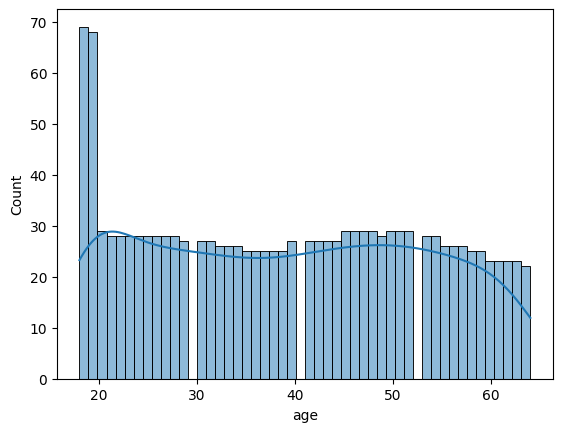

bmi :

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64




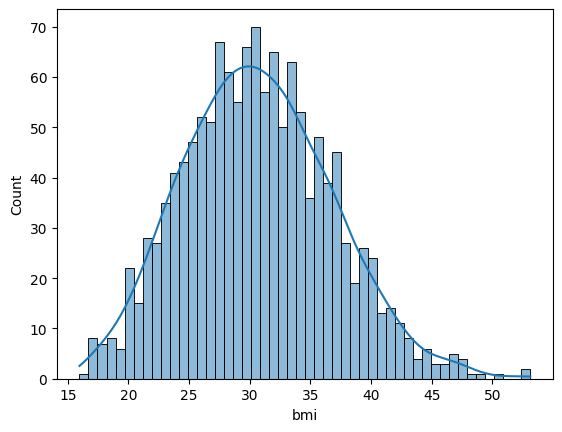

dependants :

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: dependants, dtype: float64




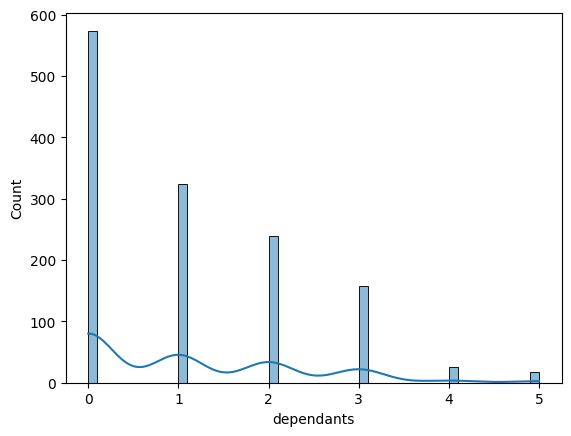

charges :

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64




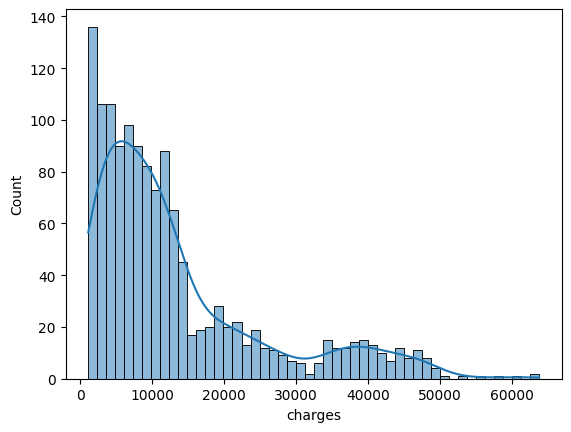

In [109]:
nums=['age','bmi', 'dependants', 'charges']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins = 50, kde=True)
   plt.show()

Sometimes due to the effect of kernel smoothing, you see negative values of x, but it may not be the case.

age :

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64




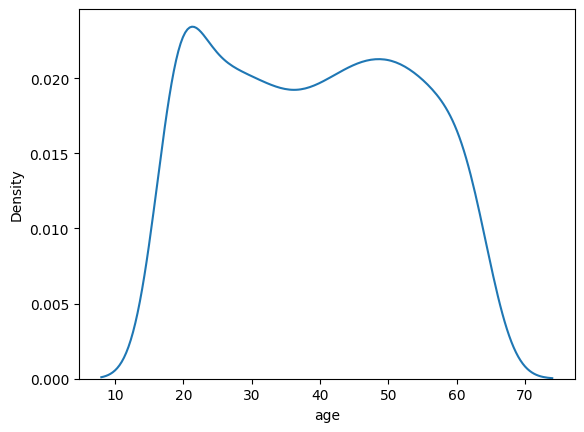

bmi :

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64




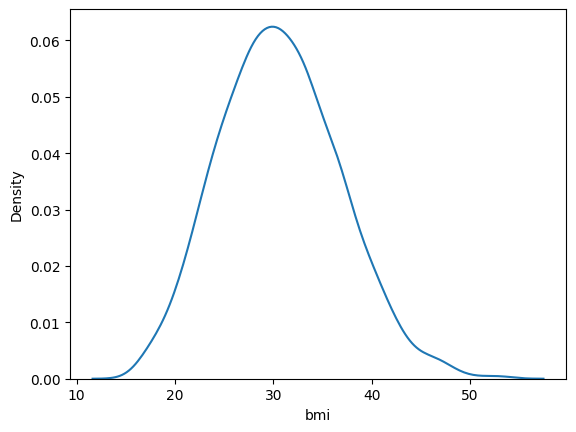

dependants :

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: dependants, dtype: float64




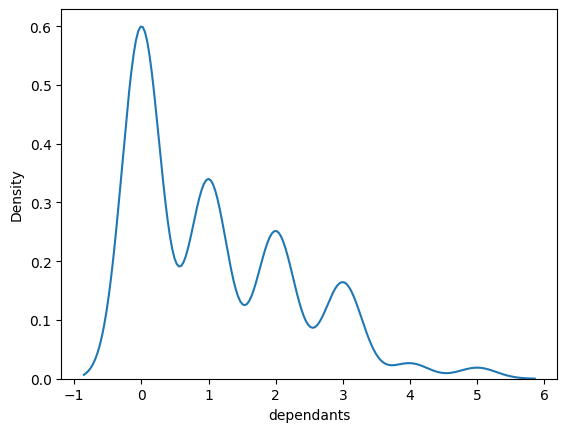

charges :

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64




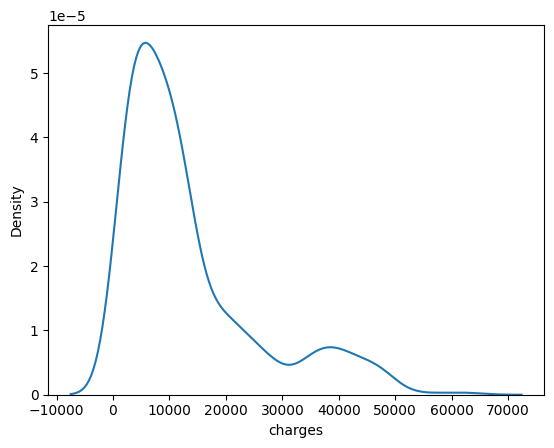

In [110]:
##Write your code to display kdeplot. Hint: reuse the for loop above for sns.kdeplot(data=records, x=i)
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.kdeplot(data=records, x=i)
   plt.show()

sex :

sex
male      676
female    662
Name: count, dtype: int64




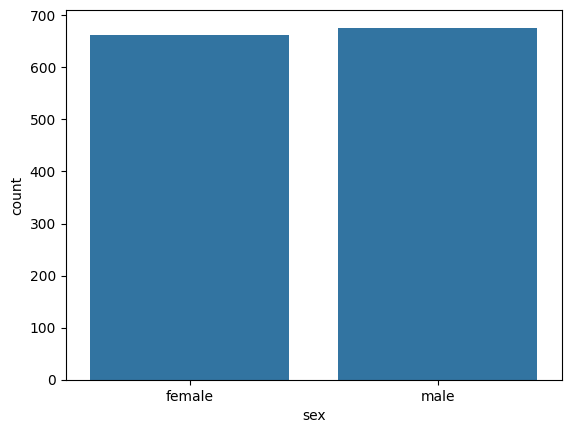

smoker :

smoker
no     1064
yes     274
Name: count, dtype: int64




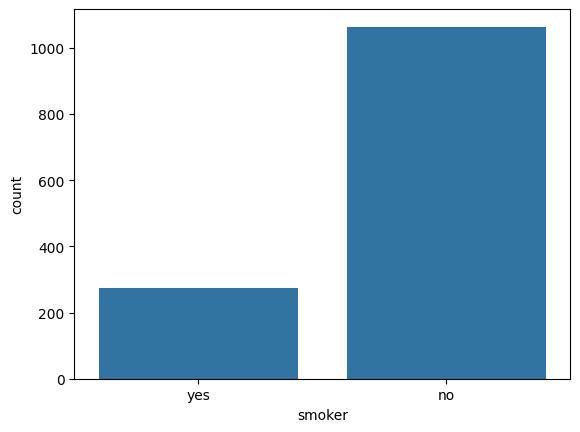

region :

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




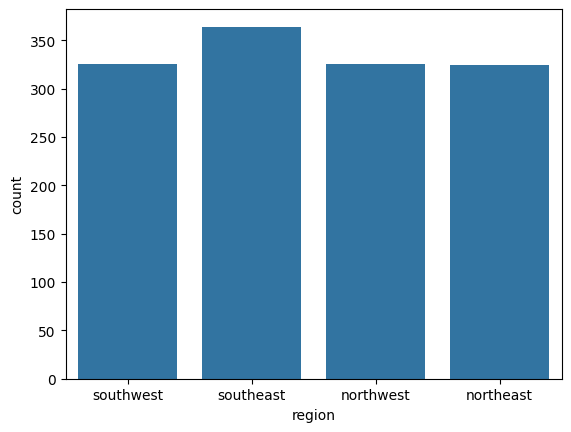

dependants :

dependants
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64




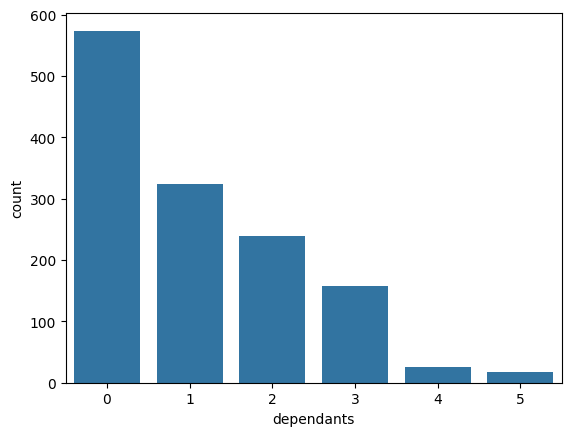

In [111]:
cats=['sex','smoker', 'region', 'dependants']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(data=records, x=i)
   plt.show()

**Bivariabe analysis**

Between numeric variables

<Axes: xlabel='age', ylabel='charges'>

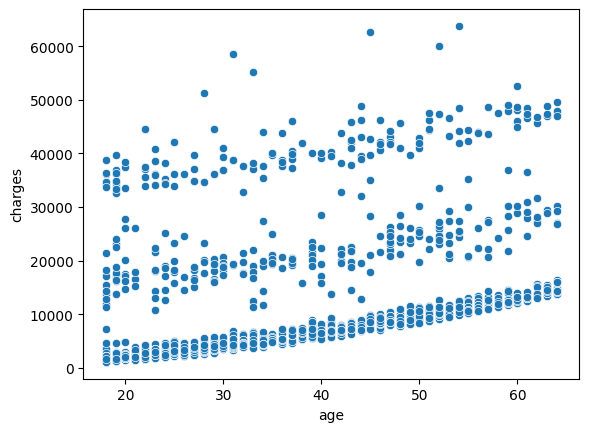

In [112]:
sns.scatterplot(data=records, x='age', y='charges')

<Axes: xlabel='bmi', ylabel='charges'>

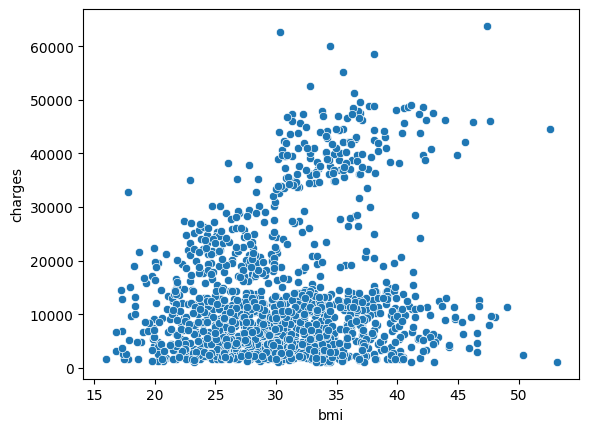

In [113]:
sns.scatterplot(data=records, x='bmi', y='charges')

Between one numeric and one categorical variables

<Axes: xlabel='charges', ylabel='Density'>

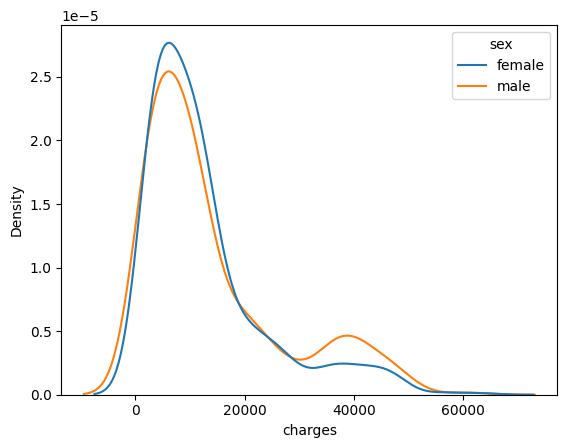

In [114]:
sns.kdeplot(data=records, x='charges', hue='sex')

<Axes: xlabel='charges', ylabel='Density'>

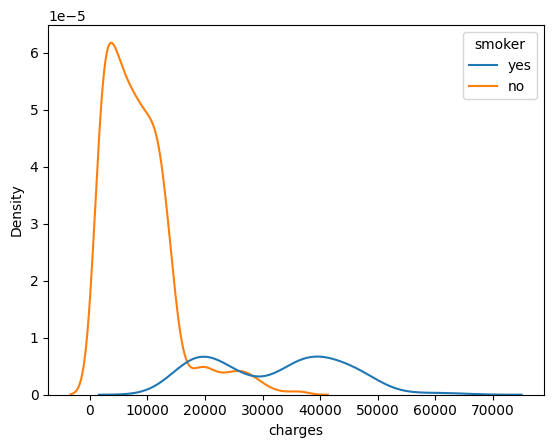

In [115]:
##Write your code to examine the relationship between x='charges' and hue='smoker'
sns.kdeplot(data=records, x='charges', hue='smoker')

<Axes: xlabel='charges', ylabel='Density'>

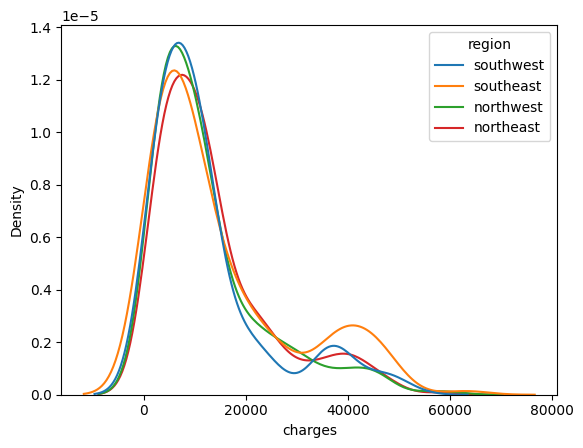

In [116]:
##Write your code to examine the relationship between x='charges' and hue='region'
sns.kdeplot(data=records, x='charges', hue='region')

sex :

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object




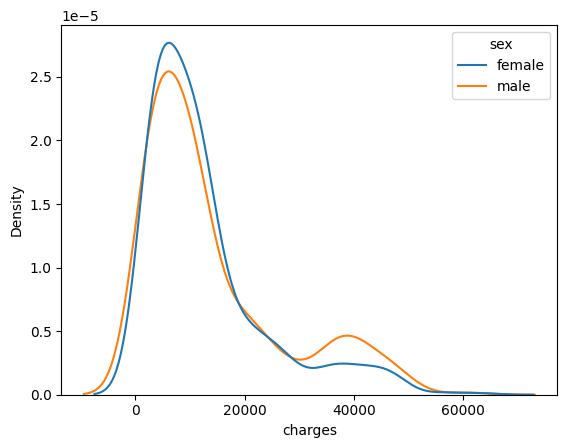

smoker :

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object




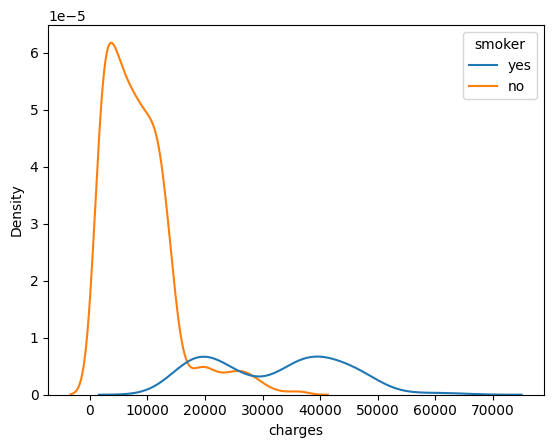

region :

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object




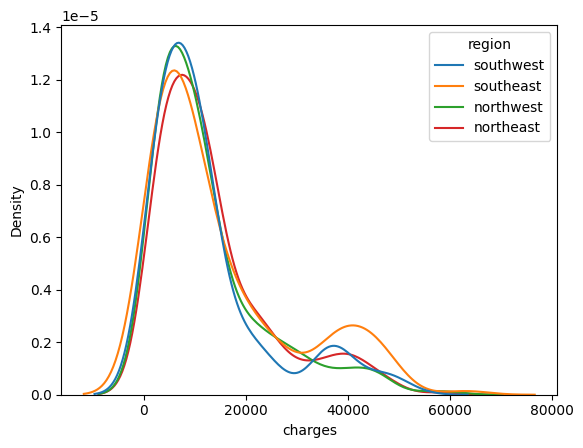

dependants :

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: dependants, dtype: float64




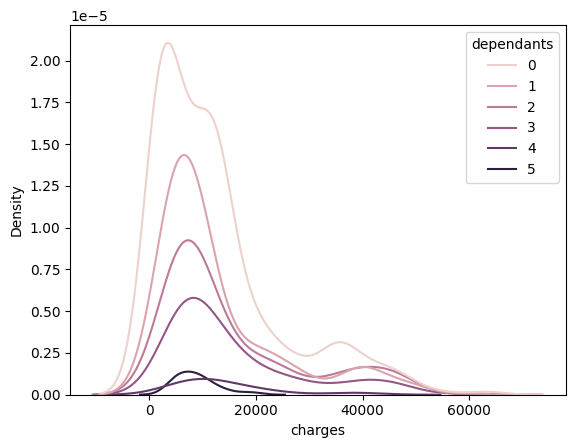

In [117]:
#Alternatively, display kdeplot in a loop. Hint: reuse the for loop above for sns.kdeplot(data=records, x=i)
for i in cats:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.kdeplot(data=records, x='charges', hue=i)
   plt.show()

<Axes: xlabel='charges', ylabel='sex'>

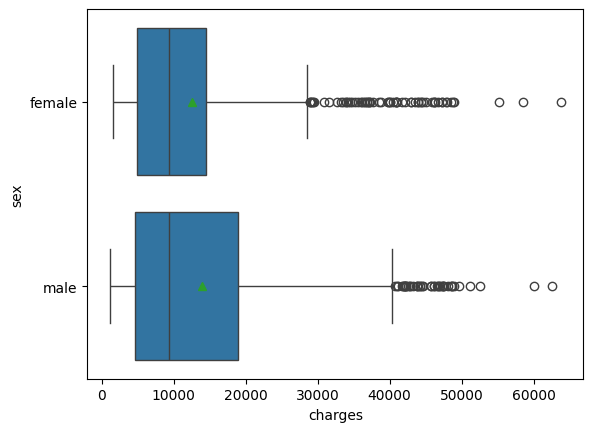

In [118]:
#boxplots of charges by sex
sns.boxplot(data=records, x='charges', y='sex', showmeans=True)

<Axes: xlabel='charges', ylabel='smoker'>

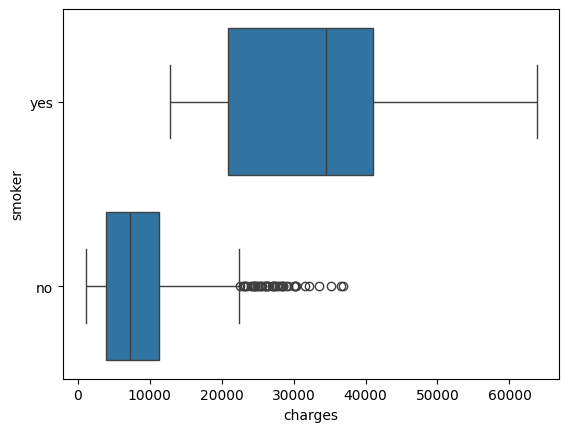

In [119]:
##Write your code to display boxplots of charges by smoker
sns.boxplot(data=records, x='charges', y='smoker')

<Axes: xlabel='charges', ylabel='region'>

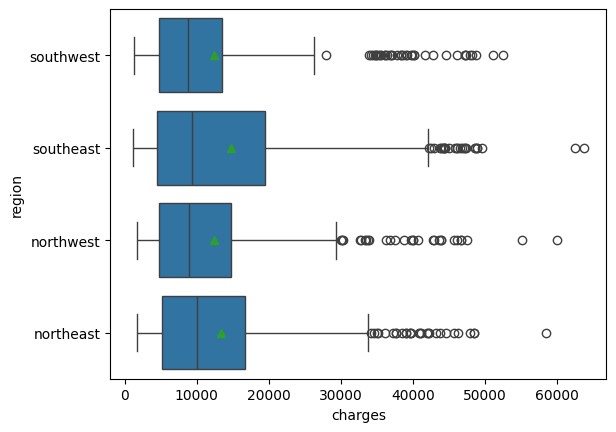

In [120]:
##Write your code to display boxplots of charges by region
sns.boxplot(data=records, x='charges', y='region', showmeans=True)

<Axes: xlabel='dependants', ylabel='charges'>

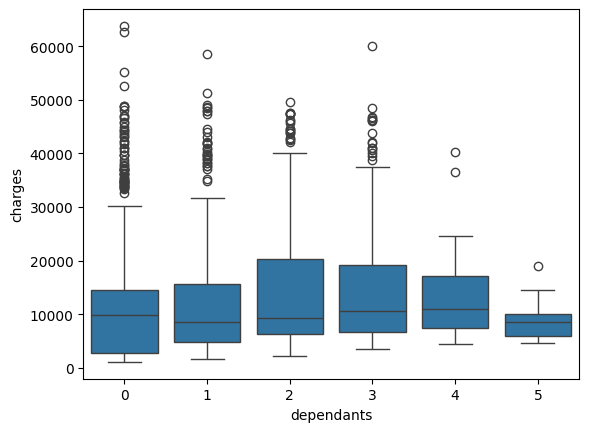

In [121]:
##Write your code to display boxplots of charges by dependants
sns.boxplot(data=records, y='charges', x='dependants')

**You can explore relationships among non-target variables**

For example

<Axes: xlabel='age', ylabel='smoker'>

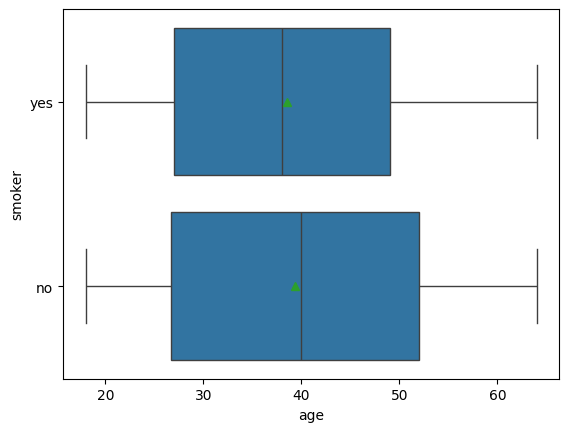

In [122]:
sns.boxplot(data=records, x='age', y='smoker', showmeans=True)

<Axes: xlabel='sex', ylabel='bmi'>

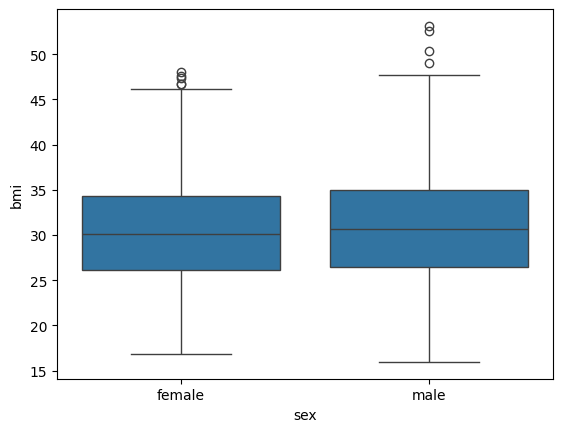

In [123]:
sns.boxplot(data=records, y='bmi', x='sex')

**Multi-variate analysis**

**You can visualise more than 2 dimensions**

<Axes: xlabel='age', ylabel='charges'>

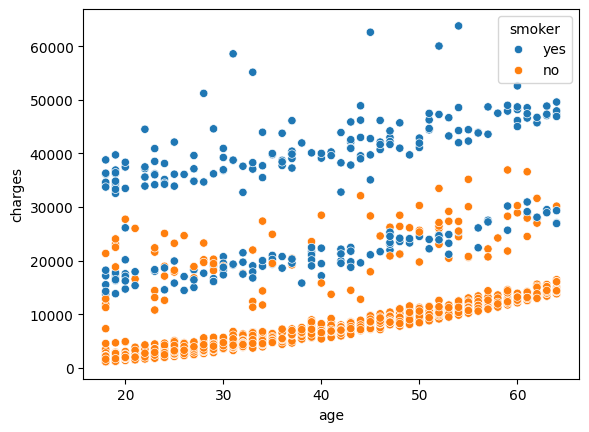

In [124]:
sns.scatterplot(data=records, x='age', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

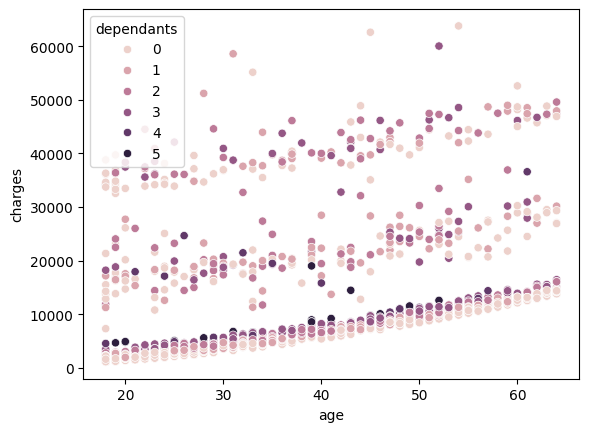

In [125]:
sns.scatterplot(data=records, x='age', y='charges', hue='dependants')

<Axes: xlabel='charges', ylabel='smoker'>

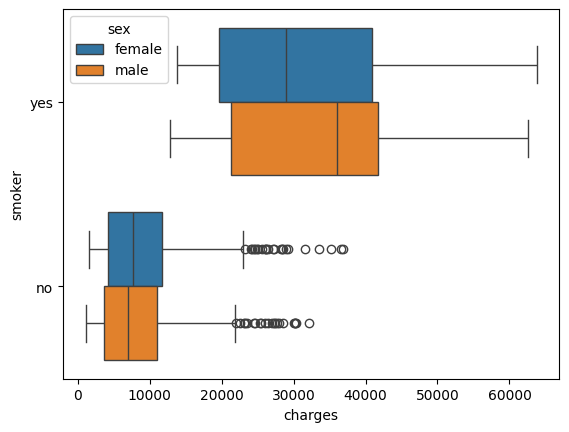

In [126]:
sns.boxplot(data=records, x='charges', y='smoker', hue='sex')

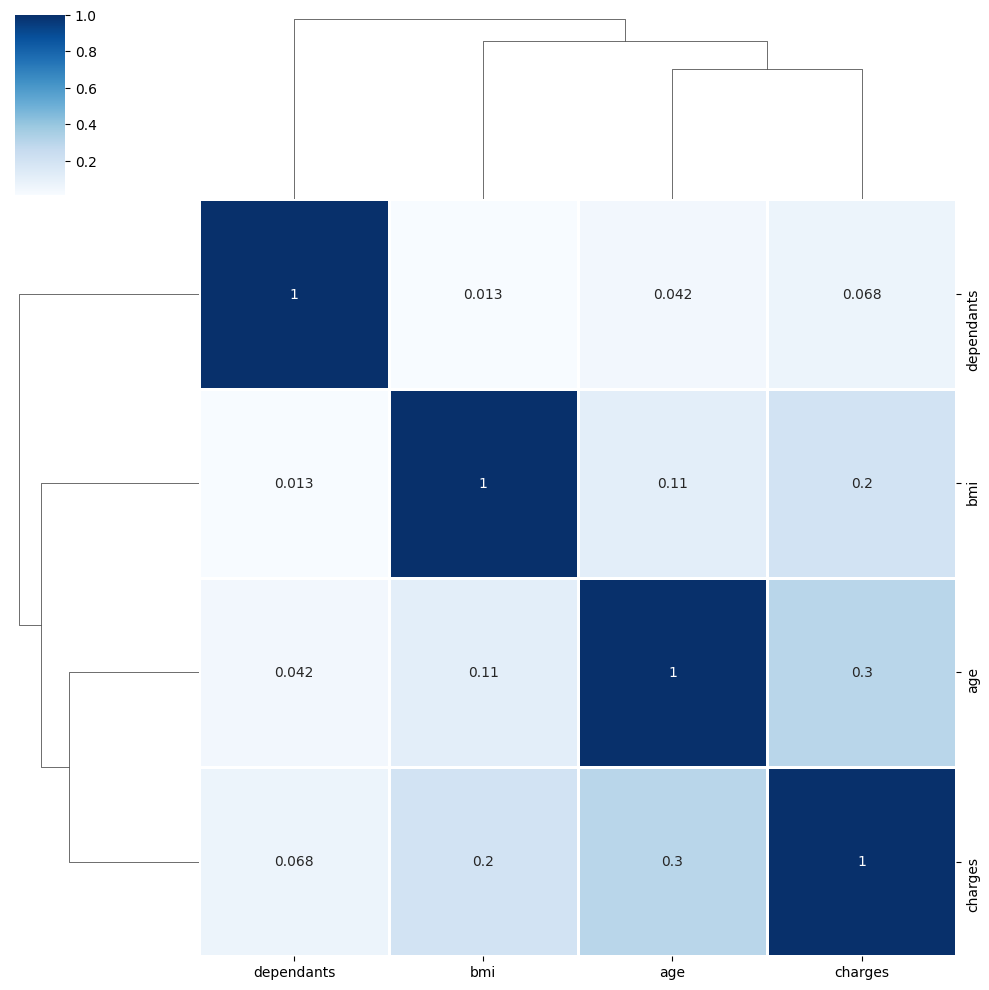

In [127]:
#visualise clustermap
sns.clustermap(data=records[nums].corr(), cmap="Blues", linewidths=.9, annot=True)

Notable contributing factors: smoker, age and bmi

### **Data preparation**
* Data conversion
* Feature selection: X
* Target specification: y
* Scale data
* Data spliting: X_train, X_test, y_train, y_test

In [128]:
records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [129]:
#Convert nominal variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex', 'region'], drop_first=True)


**Be explicit when encoding the target**

In [130]:
#convert ordinal target data to numerical
def coding_smoking(x):
    if x=='yes': return 1
    if x=='no': return 0

records['smoker'] = records['smoker'].apply(coding_smoking)

In [131]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   charges           1338 non-null   float64
 5   sex_male          1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 57.6 KB
None


In [132]:
records.describe()

,age,bmi,dependants,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


In [133]:
records

,age,bmi,dependants,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,True,True,False,False
1334,18,31.920,0,0,2205.98080,False,False,False,False
1335,18,36.850,0,0,1629.83350,False,False,True,False
1336,21,25.800,0,0,2007.94500,False,False,False,True


**Feature selection and target specification**

In [134]:
X=records.drop('charges', axis=1)
y=records['charges']

**Spliting and scaling data**

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [136]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [137]:
# Features to scale
features_to_scale = ['age', 'bmi', 'dependants' ]

# Features to keep
features_to_keep = ['smoker','sex_male','region_northwest',	'region_southeast',	'region_southwest']

In [138]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler(clip=True)


In [139]:
# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])
# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_train_scaled = pd.concat([X_train_scaled, X_train[features_to_keep].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[features_to_keep].reset_index(drop=True)], axis=1)


In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 632 to 855
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1003 non-null   int64  
 1   bmi               1003 non-null   float64
 2   dependants        1003 non-null   int64  
 3   smoker            1003 non-null   int64  
 4   sex_male          1003 non-null   bool   
 5   region_northwest  1003 non-null   bool   
 6   region_southeast  1003 non-null   bool   
 7   region_southwest  1003 non-null   bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 43.1 KB


Note in the above code we use the same scaler learned from X_train to transform the X_test. To ensure the range we can use scaler = MinMaxScaler(clip=True). Be aware of potential information loss if the X_test has values outside the Min and Max of X_train.

If we don't use clip-True, we may have scaled values outside [0,1] but we avoid information loss.

In [141]:
X_train_scaled.describe()

,age,bmi,dependants,smoker
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,0.462721,0.396758,0.213161,0.198405
std,0.304570,0.165592,0.237557,0.398998
min,0.000000,0.000000,0.000000,0.000000
25%,0.184783,0.278585,0.000000,0.000000
50%,0.456522,0.385930,0.200000,0.000000
75%,0.717391,0.505112,0.400000,0.000000
max,1.000000,1.000000,1.000000,1.000000


We don't usually scale the target variable (y_train and y_test) in regression problems to get the results of estimation. Otherwise we should re-transform them!

## **2.2. KNN Model building**

In [142]:
from sklearn.neighbors import KNeighborsRegressor


In [143]:
# Create a KNN regressor object
k=31
knn = KNeighborsRegressor(k)

##Write your code to fit the model to the SCALED training data
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=31)

In [144]:
##Write your code to predict the charges for the SCALED testing data
y_pred_knn = knn.predict(X_test_scaled)

## **2.3. Performance Evaluation**
* Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable.

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination.

In [145]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [146]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_knn})
#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head()


,age,bmi,dependants,smoker,sex_male,region_northwest,region_southeast,region_southwest,Actual,Predicted
748,47,36.000,1,0,False,False,False,True,8556.90700,10360.248285
745,50,30.115,1,0,False,True,False,False,9910.35985,11388.764250
57,18,31.680,2,1,True,False,True,False,34303.16720,34305.572374
546,28,35.435,0,0,True,False,False,False,3268.84665,4703.912455
279,51,21.560,1,0,False,False,True,False,9855.13140,10309.183969


In [147]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred_knn)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred_knn)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred_knn)

print(f"Root Mean Squared Error in $: {np.sqrt(mse):.3f}")
print(f"Mean Absolute Error in $: {mae:.3f}")
print(f"R2: {r2:.4f}")

Root Mean Squared Error in $: 6812.186
Mean Absolute Error in $: 4281.695
R2: 0.6921


An RMSE of \$6,812.186 means that, on average, the model's predictions are approximately \$6,812 off from the actual values, overestimation or underestimation.

An MAE of \$4,281.695  means that the model's predictions are, on average, about \$4,282 off from the actual values, overestimation or underestimation.

The R2 score, also known as the coefficient of determination, tells us how well our model explains the variance in the dependent variable. An R2 score of 0.6921 means that approximately 69.21% of the variability in the dependent variable is explained by the model. An R2 value close to 1 indicates that the model explains a large portion of the variance in the dependent variable.

RMSE and MAE should be considered in two contexts: 1) in relation to the dataset by comparing the descriptive statistics of y_test and y_pred, as well as the RMSE and MAE of different models; 2) by comparing your results against those reported in related research papers or industry reports.

## **2.4 Post-analysis**
**Compare stats of the actual and predicted values**

In [148]:
inspection.Actual.describe()

count      335.000000
mean     13854.613829
std      12295.423454
min       1136.399400
25%       4889.309650
50%       9788.865900
75%      18082.778600
max      58571.074480
Name: Actual, dtype: float64

In [149]:
##Write your code to see descriptive stats for inspection.Predicted
inspection.Predicted.describe()

count      335.000000
mean     12605.094661
std       8873.018185
min       3249.871079
25%       6191.728049
50%      10088.337968
75%      13096.767975
max      38571.207306
Name: Predicted, dtype: float64

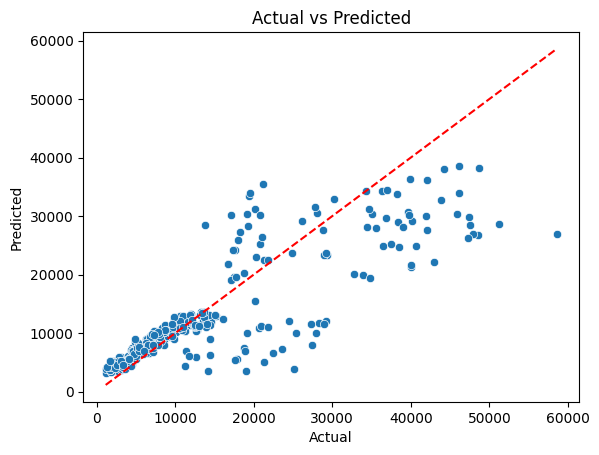

In [150]:
sns.scatterplot(data=inspection, x=inspection.Actual, y=inspection.Predicted)

# Line where Actual and Predicted are the same
sns.lineplot(x=inspection['Actual'], y=inspection['Actual'], color='red', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [151]:
#run the below if you have problem with 'str' object is not callable - some variable is taken a built in function
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [152]:
residuals_knn = y_test - y_pred_knn

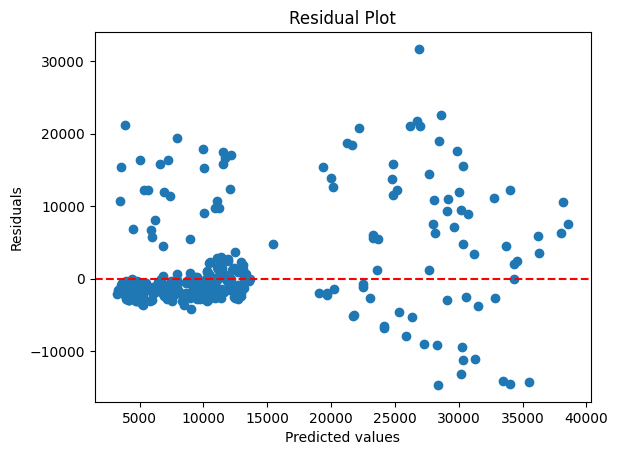

In [153]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_knn, residuals_knn)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## **5.3 Cross validation**

### **K-fold cross validation**

In [154]:
#Import Kfold
from sklearn.model_selection import KFold, cross_val_score

In [155]:
# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

In [156]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()


In [157]:
# Features to scale
features_to_scale = ['age', 'bmi', 'dependants' ]

# Features to keep
features_to_keep = ['smoker','sex_male','region_northwest',	'region_southeast',	'region_southwest']

In [158]:
# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X[features_to_scale])

# Create DataFrames from the scaled values
X_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_scaled = pd.concat([X_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)


In [159]:
# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=31)


Scikit-learn's cross_val_score function is designed so that higher scores indicate better performance. This works well for metrics like accuracy, precision, and recall, where higher values are indeed better. Thus neg_mean_squared_error is returned in cross_val_score. We can negate them to get the MSE and then take the square root to get the root mean squared error (RMSE) if that's our metric of interest.

In [160]:
# Perform cross-validation on the KNN model
neg_mse_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))


Average RMSE: 6512.18 (95% CI: 6057.38, 6966.97)
Average R2: 0.71 (95% CI: 0.69, 0.73)


*Food for thought:* the scaler is fit on the entire dataset, which would technically be information leakage if you apply it in a cross-validation loop.

To address this we can fit the scaler on the training portion of each fold and transform the test portion of each fold, using the Pipeline class, but another time.

## **5.4. Ensemble learning for regression**

### **RandomForestRegressor**

In [161]:
#Import functions
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [162]:
# Create the random forest regressor ensemble learner model
rf_model = RandomForestRegressor(n_estimators=100, random_state=2023)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the mean squared error of the model's predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the R2 score
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Root Mean Squared Error in $: {np.sqrt(mse_rf):.3f}")
print(f"R2: {r2_rf:.4f}")

Root Mean Squared Error in $: 4928.131
R2: 0.8389


### **Ada Boost Regressor**

In [163]:
# Create the Ada Boost Regressor ensemble learner model
ab_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=2023)

# Train the model on the training data
ab_model.fit(X_train_scaled, y_train)

##Write your code to make predictions on the testing data
y_pred_ab = ab_model.predict(X_test_scaled)

##Write your code to calculate the mean squared error of the model's predictions
mse_ab = mean_squared_error(y_test, y_pred_ab)

##Write your code calculate the R2 score
r2_ab = r2_score(y_test, y_pred_ab)

print(f"Root Mean Squared Error in $: {np.sqrt(mse_ab):.3f}")
print(f"R2: {r2_ab:.4f}")

Root Mean Squared Error in $: 4903.595
R2: 0.8405


### **Gradient Boosting Regressor**

In [164]:
# Create the Gradient Boosting Regressor ensemble learner model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=2023)

# Train the model on the training data
gbr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Calculate the mean squared error of the model's predictions
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# Calculate the R2 score
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Root Mean Squared Error in $: {np.sqrt(mse_gbr):.3f}")
print(f"R2: {r2_gbr:.4f}")

Root Mean Squared Error in $: 4514.553
R2: 0.8648


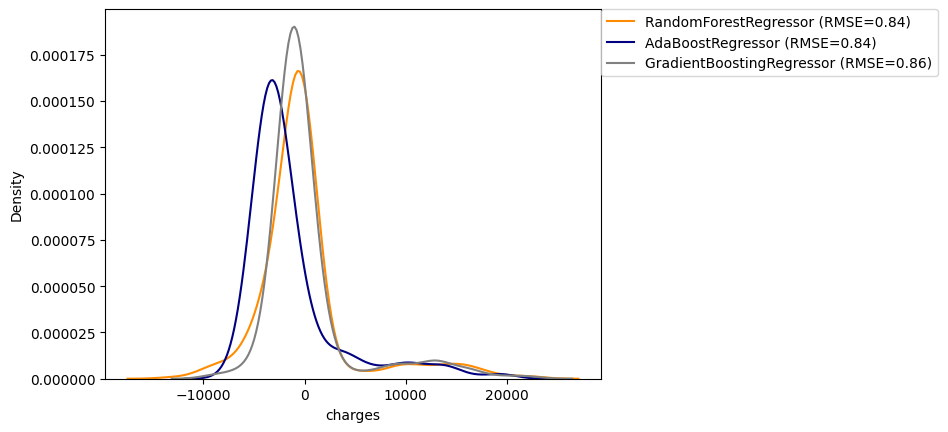

In [165]:
fig, ax = plt.subplots()

sns.kdeplot(x=y_test-y_pred_rf, color='darkorange', label=f'RandomForestRegressor (RMSE={r2_rf:.2f})', ax=ax)
sns.kdeplot(x=y_test-y_pred_ab, color='navy', label=f'AdaBoostRegressor (RMSE={r2_ab:.2f})' , ax=ax)
sns.kdeplot(x=y_test-y_pred_gbr, color='gray', label=f'GradientBoostingRegressor (RMSE={r2_gbr:.2f})' , ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.show()

### **Stacking**

In [166]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [167]:
# Define base models
estimators = [
    ('lr', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=31)),
    ('dt', DecisionTreeRegressor(max_depth=10)),
    ('ann', MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=500))
]

In [168]:
# Define the meta-classifier
meta_classifier = LinearRegression()

# Create the Stacking Regressor model
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=meta_classifier)


In [169]:
# Fit the stacking model on the scaled training data
stacking_regressor.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor(n_neighbors=31)),
                              ('dt', DecisionTreeRegressor(max_depth=10)),
                              ('ann',
                               MLPRegressor(hidden_layer_sizes=(32, 16),
                                            max_iter=500))],
                  final_estimator=LinearRegression())

In [170]:

##Write your code evaluate on the scaled test data
y_pred_stackedmodel = stacking_regressor.predict(X_test_scaled)

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [172]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_stackedmodel)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred_stackedmodel)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred_stackedmodel)

# Print the results
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R2 Score: {r2:.3f}")

Root Mean Squared Error: 5176.484
Mean Absolute Error: 3068.324
R2 Score: 0.822


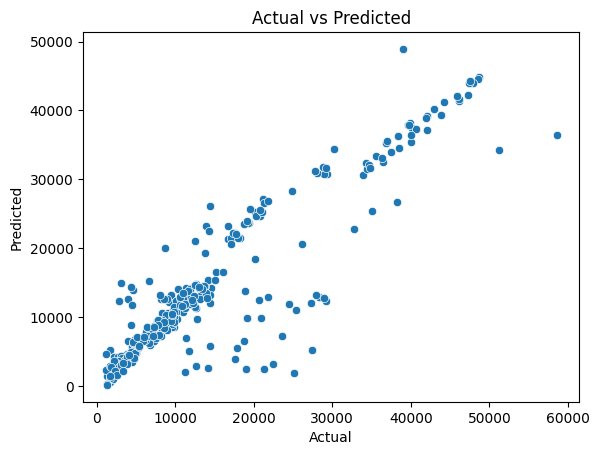

In [173]:
sns.scatterplot(data=inspection, x=y_test, y=y_pred_stackedmodel)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [174]:
#run the below if you have problem with 'str' object is not callable - some variable is taken a built in function
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [175]:
residuals_stackedmodel = y_test - y_pred_stackedmodel

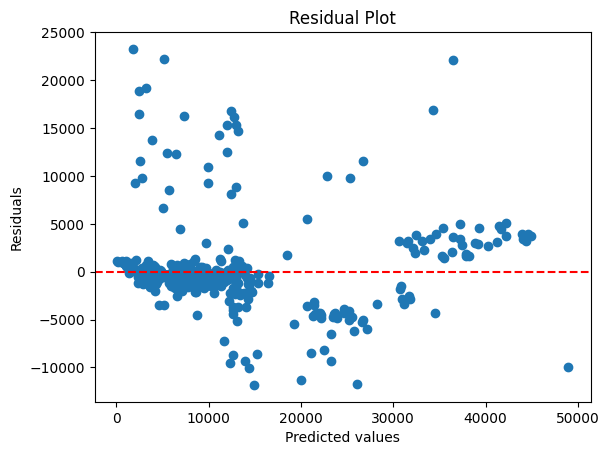

In [176]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_stackedmodel, residuals_stackedmodel)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()